In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1.1 Importing libraries

In [40]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# 1.2 Collecting data

In [3]:
!cd data

In [4]:
!kg download -u puzzlemusa -p puzzlemusa13 -c whale-categorization-playground

Starting new HTTPS connection (1): www.kaggle.com
downloading https://www.kaggle.com/c/whale-categorization-playground/download/sample_submission.csv

Starting new HTTPS connection (1): storage.googleapis.com
sample_submission.csv 100% |########################| Time: 0:00:03 291.1 KiB/s

downloading https://www.kaggle.com/c/whale-categorization-playground/download/train.csv

train.csv 100% |####################################| Time: 0:00:01 180.6 KiB/s

downloading https://www.kaggle.com/c/whale-categorization-playground/download/test.zip

test.zip 100% |#####################################| Time: 0:31:13 221.5 KiB/s

downloading https://www.kaggle.com/c/whale-categorization-playground/download/train.zip

Resetting dropped connection: www.kaggle.com
train.zip 100% |####################################| Time: 0:13:48 321.0 KiB/s



In [5]:
!unzip train.zip
!unzip test.zip

Archive:  train.zip
   creating: train/
  inflating: train/84da76f5.jpg      
  inflating: train/d5c9c1f2.jpg      
  inflating: train/943cb663.jpg      
  inflating: train/906c534e.jpg      
  inflating: train/cca9cd4e.jpg      
  inflating: train/dabfedb4.jpg      
  inflating: train/07b8b278.jpg      
  inflating: train/c3b79ec4.jpg      
  inflating: train/a549a05f.jpg      
  inflating: train/d87e29dc.jpg      
  inflating: train/dfee01f1.jpg      
  inflating: train/74861c16.jpg      
  inflating: train/6ee9e357.jpg      
  inflating: train/0caa3541.jpg      
  inflating: train/fff04277.jpg      
  inflating: train/d2796dc6.jpg      
  inflating: train/cd656086.jpg      
  inflating: train/04a91387.jpg      
  inflating: train/374aaece.jpg      
  inflating: train/eef1c346.jpg      
  inflating: train/3b4495e4.jpg      
  inflating: train/1d35c098.jpg      
  inflating: train/f87447c6.jpg      
  inflating: train/c87be503.jpg      
  inflating: train/345382b4.jpg      
  inflatin

  inflating: train/3bc0fffd.jpg      
  inflating: train/93f8ee9b.jpg      
  inflating: train/7dea57a7.jpg      
  inflating: train/cb637e0c.jpg      
  inflating: train/ac2801ff.jpg      
  inflating: train/04ad14b2.jpg      
  inflating: train/46761c1d.jpg      
  inflating: train/77cfe137.jpg      
  inflating: train/43e9dd06.jpg      
  inflating: train/ffe5c306.jpg      
  inflating: train/c6c93020.jpg      
  inflating: train/96b3fd19.jpg      
  inflating: train/14f8c2ec.jpg      
  inflating: train/5eab4453.jpg      
  inflating: train/631900b0.jpg      
  inflating: train/152b90d0.jpg      
  inflating: train/c7a83448.jpg      
  inflating: train/39b2ddce.jpg      
  inflating: train/980ec8e0.jpg      
  inflating: train/2b182122.jpg      
  inflating: train/55c244db.jpg      
  inflating: train/a7bdc4de.jpg      
  inflating: train/858dbfa3.jpg      
  inflating: train/73e05158.jpg      
  inflating: train/ec2e7581.jpg      
  inflating: train/e72c65d7.jpg      
  inflating:

  inflating: train/b8356f63.jpg      
  inflating: train/d3b5b5cb.jpg      
  inflating: train/8d411144.jpg      
  inflating: train/717d5a0a.jpg      
  inflating: train/90fb721a.jpg      
  inflating: train/e049b484.jpg      
  inflating: train/479397f6.jpg      
  inflating: train/1c32608c.jpg      
  inflating: train/178395e6.jpg      
  inflating: train/6617fcf5.jpg      
  inflating: train/3e550c8a.jpg      
  inflating: train/55a3e8e7.jpg      
  inflating: train/fdc286d7.jpg      
  inflating: train/5045a008.jpg      
  inflating: train/a858d7a4.jpg      
  inflating: train/a1375102.jpg      
  inflating: train/b9688c4b.jpg      
  inflating: train/72669ac0.jpg      
  inflating: train/1933258b.jpg      
  inflating: train/fb93a9ab.jpg      
  inflating: train/9cde75d8.jpg      
  inflating: train/53942b0b.jpg      
  inflating: train/871d522d.jpg      
  inflating: train/e567029f.jpg      
  inflating: train/7b484271.jpg      
  inflating: train/8c588bec.jpg      
  inflating:

  inflating: train/50b4bbc4.jpg      
  inflating: train/70953372.jpg      
  inflating: train/9f52074b.jpg      
  inflating: train/817f06d1.jpg      
  inflating: train/02e6188b.jpg      
  inflating: train/cd91f5d4.jpg      
  inflating: train/c90e85de.jpg      
  inflating: train/1d22d565.jpg      
  inflating: train/28e72c6b.jpg      
  inflating: train/4425522f.jpg      
  inflating: train/06cbdaa5.jpg      
  inflating: train/257136a5.jpg      
  inflating: train/48f3c699.jpg      
  inflating: train/e34c10d1.jpg      
  inflating: train/74d3a0de.jpg      
  inflating: train/20e01275.jpg      
  inflating: train/c7102d1c.jpg      
  inflating: train/fc7a3fd6.jpg      
  inflating: train/3ee9b8b3.jpg      
  inflating: train/f4d6ec4e.jpg      
  inflating: train/c277348b.jpg      
  inflating: train/59354da2.jpg      
  inflating: train/c10e0774.jpg      
  inflating: train/ceaa624d.jpg      
  inflating: train/f33faf90.jpg      
  inflating: train/a575a5d8.jpg      
  inflating:

  inflating: train/3ae556d3.jpg      
  inflating: train/a01511d8.jpg      
  inflating: train/b301cded.jpg      
  inflating: train/b26ddbdd.jpg      
  inflating: train/b69d8fdb.jpg      
  inflating: train/481d0d1d.jpg      
  inflating: train/06f3adae.jpg      
  inflating: train/45704eae.jpg      
  inflating: train/8b2ea6b8.jpg      
  inflating: train/8033d7bc.jpg      
  inflating: train/c398d294.jpg      
  inflating: train/bc8719f4.jpg      
  inflating: train/83ca8382.jpg      
  inflating: train/4f7e290b.jpg      
  inflating: train/1ba99b65.jpg      
  inflating: train/70817bbd.jpg      
  inflating: train/2d9d1409.jpg      
  inflating: train/8c94a8d0.jpg      
  inflating: train/325b96a4.jpg      
  inflating: train/7dff8da6.jpg      
  inflating: train/45c240e6.jpg      
  inflating: train/9e77c15f.jpg      
  inflating: train/a6b00d23.jpg      
  inflating: train/76d6df54.jpg      
  inflating: train/a7ac40db.jpg      
  inflating: train/1efe5ef7.jpg      
  inflating:

  inflating: train/01d890d8.jpg      
  inflating: train/2faee991.jpg      
  inflating: train/c0388c6d.jpg      
  inflating: train/5819cda8.jpg      
  inflating: train/a478ef7b.jpg      
  inflating: train/5141a57f.jpg      
  inflating: train/60b2b462.jpg      
  inflating: train/7188469b.jpg      
  inflating: train/9321f429.jpg      
  inflating: train/ab26e317.jpg      
  inflating: train/654e9beb.jpg      
  inflating: train/61c93051.jpg      
  inflating: train/e7744400.jpg      
  inflating: train/8e6f17a3.jpg      
  inflating: train/13f70e1b.jpg      
  inflating: train/c00a4d96.jpg      
  inflating: train/5cd60368.jpg      
  inflating: train/1fd7a878.jpg      
  inflating: train/23d3b23b.jpg      
  inflating: train/e8870bec.jpg      
  inflating: train/613cbac6.jpg      
  inflating: train/de67f3ab.jpg      
  inflating: train/ae8aa8b1.jpg      
  inflating: train/7722dced.jpg      
  inflating: train/7867e3f4.jpg      
  inflating: train/a80d4d06.jpg      
  inflating:

  inflating: train/0baeeb07.jpg      
  inflating: train/f1568ff5.jpg      
  inflating: train/8fadebca.jpg      
  inflating: train/c5052b58.jpg      
  inflating: train/a65ce8dd.jpg      
  inflating: train/26d4bdb5.jpg      
  inflating: train/f1bebb68.jpg      
  inflating: train/32c16e81.jpg      
  inflating: train/efa0f6cc.jpg      
  inflating: train/2cd6e201.jpg      
  inflating: train/cb6b11e9.jpg      
  inflating: train/c818a11a.jpg      
  inflating: train/25c45056.jpg      
  inflating: train/09394b01.jpg      
  inflating: train/36e45ae5.jpg      
  inflating: train/58d6988e.jpg      
  inflating: train/41361b5f.jpg      
  inflating: train/bd44a0ea.jpg      
  inflating: train/4c47bbea.jpg      
  inflating: train/7ac677ed.jpg      
  inflating: train/bc473d57.jpg      
  inflating: train/80073591.jpg      
  inflating: train/d00ef0ba.jpg      
  inflating: train/a0706b78.jpg      
  inflating: train/67586c73.jpg      
  inflating: train/560b5b79.jpg      
  inflating:

  inflating: train/6fcd141f.jpg      
  inflating: train/05330b65.jpg      
  inflating: train/01692e13.jpg      
  inflating: train/50a0802f.jpg      
  inflating: train/3c2fe4b5.jpg      
  inflating: train/31b765e9.jpg      
  inflating: train/12be1c1b.jpg      
  inflating: train/471cc7c1.jpg      
  inflating: train/503fabc0.jpg      
  inflating: train/2c770a16.jpg      
  inflating: train/686577b3.jpg      
  inflating: train/9a9c1717.jpg      
  inflating: train/c2a610eb.jpg      
  inflating: train/1451c226.jpg      
  inflating: train/4891d144.jpg      
  inflating: train/dd64c189.jpg      
  inflating: train/41413acb.jpg      
  inflating: train/ab9cf06a.jpg      
  inflating: train/2b624b95.jpg      
  inflating: train/70923b42.jpg      
  inflating: train/d56b6f59.jpg      
  inflating: train/b274a606.jpg      
  inflating: train/2217bebd.jpg      
  inflating: train/f3840c08.jpg      
  inflating: train/3a935629.jpg      
  inflating: train/d5f60a62.jpg      
  inflating:

  inflating: train/7007537a.jpg      
  inflating: train/d8eb38fe.jpg      
  inflating: train/f621cd02.jpg      
  inflating: train/ae35d301.jpg      
  inflating: train/1b2ca25b.jpg      
  inflating: train/674fbd89.jpg      
  inflating: train/c15de6e9.jpg      
  inflating: train/4227fffe.jpg      
  inflating: train/66643896.jpg      
  inflating: train/fc120e58.jpg      
  inflating: train/78d229fb.jpg      
  inflating: train/6a9e02f1.jpg      
  inflating: train/7afc4528.jpg      
  inflating: train/04d69405.jpg      
  inflating: train/ace45792.jpg      
  inflating: train/efa7a1db.jpg      
  inflating: train/7a97472d.jpg      
  inflating: train/a4cecff0.jpg      
  inflating: train/aa1569e8.jpg      
  inflating: train/13357a9c.jpg      
  inflating: train/d9bccd25.jpg      
  inflating: train/11402db3.jpg      
  inflating: train/bf53fcf1.jpg      
  inflating: train/b6018681.jpg      
  inflating: train/ee00c211.jpg      
  inflating: train/afbbbda4.jpg      
  inflating:

  inflating: train/af257cdd.jpg      
  inflating: train/47530a57.jpg      
  inflating: train/e6943a2a.jpg      
  inflating: train/4c67d676.jpg      
  inflating: train/6c591070.jpg      
  inflating: train/fdf87a0d.jpg      
  inflating: train/8374dad3.jpg      
  inflating: train/5cc07b15.jpg      
  inflating: train/88bddc7c.jpg      
  inflating: train/88d7abf3.jpg      
  inflating: train/b5f01672.jpg      
  inflating: train/fe450c91.jpg      
  inflating: train/68a2314d.jpg      
  inflating: train/1d869cfe.jpg      
  inflating: train/eea93983.jpg      
  inflating: train/60955a65.jpg      
  inflating: train/f9992bbb.jpg      
  inflating: train/06c5c28e.jpg      
  inflating: train/a596311e.jpg      
  inflating: train/f14d863f.jpg      
  inflating: train/5a84a4af.jpg      
  inflating: train/3e88c7fc.jpg      
  inflating: train/a9e5d5aa.jpg      
  inflating: train/c9c0da9d.jpg      
  inflating: train/ea3bccc4.jpg      
  inflating: train/73fdf464.jpg      
  inflating:

  inflating: train/b82f35fc.jpg      
  inflating: train/fc226174.jpg      
  inflating: train/e51d0726.jpg      
  inflating: train/f3d5e3f6.jpg      
  inflating: train/780956c8.jpg      
  inflating: train/245f7a16.jpg      
  inflating: train/0d6978c3.jpg      
  inflating: train/feb9ded0.jpg      
  inflating: train/24802532.jpg      
  inflating: train/07a5d734.jpg      
  inflating: train/5b06de92.jpg      
  inflating: train/a300e9ee.jpg      
  inflating: train/f7e7a91f.jpg      
  inflating: train/141eed20.jpg      
  inflating: train/682bcef4.jpg      
  inflating: train/848bbffe.jpg      
  inflating: train/0025e8c2.jpg      
  inflating: train/29755381.jpg      
  inflating: train/2a83965f.jpg      
  inflating: train/2b99a921.jpg      
  inflating: train/f7542208.jpg      
  inflating: train/a0a67a94.jpg      
  inflating: train/fe5f33d6.jpg      
  inflating: train/dba76cd8.jpg      
  inflating: train/7cecbddc.jpg      
  inflating: train/49d9efc3.jpg      
  inflating:

  inflating: train/dcba2da7.jpg      
  inflating: train/608f82a4.jpg      
  inflating: train/ff2965ba.jpg      
  inflating: train/d3af29e6.jpg      
  inflating: train/6bc03788.jpg      
  inflating: train/c4452d8d.jpg      
  inflating: train/294ddef1.jpg      
  inflating: train/c98e3115.jpg      
  inflating: train/9aa92465.jpg      
  inflating: train/e1859c37.jpg      
  inflating: train/840a6b0a.jpg      
  inflating: train/eb55c78c.jpg      
  inflating: train/7962e1cc.jpg      
  inflating: train/ef20a19e.jpg      
  inflating: train/4d9f10a3.jpg      
  inflating: train/ca4ef1b5.jpg      
  inflating: train/5d4cdf6d.jpg      
  inflating: train/56f9775c.jpg      
  inflating: train/58148970.jpg      
  inflating: train/da569fe8.jpg      
  inflating: train/1c03483e.jpg      
  inflating: train/06127f81.jpg      
  inflating: train/0fddb687.jpg      
  inflating: train/7df73caa.jpg      
  inflating: train/46b7dba5.jpg      
  inflating: train/edbf320f.jpg      
  inflating:

  inflating: train/14be1a9e.jpg      
  inflating: train/0ca843f9.jpg      
  inflating: train/4c4fd420.jpg      
  inflating: train/9e6ff81f.jpg      
  inflating: train/1ba663d7.jpg      
  inflating: train/b472b5a8.jpg      
  inflating: train/f0c9a860.jpg      
  inflating: train/d26b82d3.jpg      
  inflating: train/2ed94ff4.jpg      
  inflating: train/4fc7419c.jpg      
  inflating: train/4ca167b7.jpg      
  inflating: train/ec7e2953.jpg      
  inflating: train/4bd5bedb.jpg      
  inflating: train/30efc90e.jpg      
  inflating: train/c837a3ef.jpg      
  inflating: train/8eb500b3.jpg      
  inflating: train/a0df3679.jpg      
  inflating: train/17f91b76.jpg      
  inflating: train/a777889a.jpg      
  inflating: train/09827e32.jpg      
  inflating: train/aa2ee6cf.jpg      
  inflating: train/9794021e.jpg      
  inflating: train/a2166492.jpg      
  inflating: train/90e72db7.jpg      
  inflating: train/fcc84c8e.jpg      
  inflating: train/91b40001.jpg      
  inflating:

  inflating: train/4c305e02.jpg      
  inflating: train/83ac574b.jpg      
  inflating: train/85df62da.jpg      
  inflating: train/1509a2ee.jpg      
  inflating: train/92bd7a49.jpg      
  inflating: train/49a20cb8.jpg      
  inflating: train/82f271ac.jpg      
  inflating: train/e37e2e2f.jpg      
  inflating: train/7a399627.jpg      
  inflating: train/a3e9070d.jpg      
  inflating: train/b9380d53.jpg      
  inflating: train/6bc32ac5.jpg      
  inflating: train/5ce1fb58.jpg      
  inflating: train/3f7a9eb5.jpg      
  inflating: train/24d2154b.jpg      
  inflating: train/b27a43e7.jpg      
  inflating: train/ed744e52.jpg      
  inflating: train/705339d2.jpg      
  inflating: train/8cb8761a.jpg      
  inflating: train/152fb267.jpg      
  inflating: train/c9d44cde.jpg      
  inflating: train/72bd91d0.jpg      
  inflating: train/07be1da5.jpg      
  inflating: train/c7dcf574.jpg      
  inflating: train/e8cf10ce.jpg      
  inflating: train/63d883ff.jpg      
  inflating:

  inflating: train/7d0f4048.jpg      
  inflating: train/8e11da15.jpg      
  inflating: train/0485c4c1.jpg      
  inflating: train/247a5f40.jpg      
  inflating: train/878dd733.jpg      
  inflating: train/108b023e.jpg      
  inflating: train/3ae0a294.jpg      
  inflating: train/8e118aab.jpg      
  inflating: train/5e1e8352.jpg      
  inflating: train/e97c42f1.jpg      
  inflating: train/430ca666.jpg      
  inflating: train/d643407d.jpg      
  inflating: train/70500cf8.jpg      
  inflating: train/9a3e3226.jpg      
  inflating: train/cceabba4.jpg      
  inflating: train/d8e7d320.jpg      
  inflating: train/0d45d434.jpg      
  inflating: train/458011b4.jpg      
  inflating: train/81bf3718.jpg      
  inflating: train/30091793.jpg      
  inflating: train/88e9d696.jpg      
  inflating: train/18e481b3.jpg      
  inflating: train/01679a6d.jpg      
  inflating: train/5d15f294.jpg      
  inflating: train/5e467657.jpg      
  inflating: train/bd48677c.jpg      
  inflating:

  inflating: train/33cdc2a8.jpg      
  inflating: train/aa48afa1.jpg      
  inflating: train/aaa2229d.jpg      
  inflating: train/cd274fb6.jpg      
  inflating: train/d550e30b.jpg      
  inflating: train/6638fd60.jpg      
  inflating: train/4b42166d.jpg      
  inflating: train/c5b95e5f.jpg      
  inflating: train/973d410c.jpg      
  inflating: train/44f90b0e.jpg      
  inflating: train/de05064b.jpg      
  inflating: train/9529dfe3.jpg      
  inflating: train/624aaf43.jpg      
  inflating: train/7c86fdd1.jpg      
  inflating: train/b19b448b.jpg      
  inflating: train/c430a3bb.jpg      
  inflating: train/54c9b3ed.jpg      
  inflating: train/6c525fea.jpg      
  inflating: train/25d4f7df.jpg      
  inflating: train/407b242b.jpg      
  inflating: train/ca2eb1a6.jpg      
  inflating: train/232b7d7f.jpg      
  inflating: train/2513f032.jpg      
  inflating: train/2712c81f.jpg      
  inflating: train/3d1f59ae.jpg      
  inflating: train/2904f7cb.jpg      
  inflating:

  inflating: train/e55ed2ec.jpg      
  inflating: train/d00185c7.jpg      
  inflating: train/0f86a67d.jpg      
  inflating: train/183cc72b.jpg      
  inflating: train/335c21d6.jpg      
  inflating: train/b36e4765.jpg      
  inflating: train/daf22347.jpg      
  inflating: train/790dca02.jpg      
  inflating: train/202952b6.jpg      
  inflating: train/34c9a7c9.jpg      
  inflating: train/8a9a05b0.jpg      
  inflating: train/5ac4811d.jpg      
  inflating: train/8982cf4f.jpg      
  inflating: train/88ad5493.jpg      
  inflating: train/3c1ac699.jpg      
  inflating: train/9f559bfa.jpg      
  inflating: train/5871e557.jpg      
  inflating: train/464abd87.jpg      
  inflating: train/9091ebc0.jpg      
  inflating: train/224f5d54.jpg      
  inflating: train/4d8d6a8c.jpg      
  inflating: train/912e6770.jpg      
  inflating: train/d501373a.jpg      
  inflating: train/de688f29.jpg      
  inflating: train/08593f8e.jpg      
  inflating: train/b6b66ef0.jpg      
  inflating:

  inflating: train/c394d0cb.jpg      
  inflating: train/57fdbc35.jpg      
  inflating: train/a8bec9ad.jpg      
  inflating: train/b11670b4.jpg      
  inflating: train/e38aa868.jpg      
  inflating: train/8083a4af.jpg      
  inflating: train/953ac5dc.jpg      
  inflating: train/2091af92.jpg      
  inflating: train/fd4fce43.jpg      
  inflating: train/bc768e7d.jpg      
  inflating: train/c2b161db.jpg      
  inflating: train/8d715656.jpg      
  inflating: train/6221819c.jpg      
  inflating: train/fcde10a2.jpg      
  inflating: train/7d346776.jpg      
  inflating: train/7dcfd458.jpg      
  inflating: train/122a9b2c.jpg      
  inflating: train/683f48a8.jpg      
  inflating: train/3f7a3e4c.jpg      
  inflating: train/f19697e2.jpg      
  inflating: train/757bb464.jpg      
  inflating: train/4c153b82.jpg      
  inflating: train/2a68623a.jpg      
  inflating: train/d029ff80.jpg      
  inflating: train/a1e8f785.jpg      
  inflating: train/d576c13d.jpg      
  inflating:

  inflating: train/74934a2c.jpg      
  inflating: train/785c3eaa.jpg      
  inflating: train/a0c8da3a.jpg      
  inflating: train/ade8176b.jpg      
  inflating: train/5f415383.jpg      
  inflating: train/3dd29ebd.jpg      
  inflating: train/42cf9ddf.jpg      
  inflating: train/0cac8109.jpg      
  inflating: train/57ac3fdd.jpg      
  inflating: train/d663565f.jpg      
  inflating: train/824b2725.jpg      
  inflating: train/2d82fd15.jpg      
  inflating: train/063acadc.jpg      
  inflating: train/b1faef42.jpg      
  inflating: train/6df48636.jpg      
  inflating: train/27ea48a8.jpg      
  inflating: train/46a25c2b.jpg      
  inflating: train/956ccbd3.jpg      
  inflating: train/612b8389.jpg      
  inflating: train/808b3724.jpg      
  inflating: train/79447a87.jpg      
  inflating: train/4498fd8f.jpg      
  inflating: train/2381de2f.jpg      
  inflating: train/9e5c2d3a.jpg      
  inflating: train/b5450110.jpg      
  inflating: train/ae1aad40.jpg      
  inflating:

  inflating: train/a7d163e8.jpg      
  inflating: train/e39272cf.jpg      
  inflating: train/4ec53c22.jpg      
  inflating: train/4cd7489b.jpg      
  inflating: train/854f741b.jpg      
  inflating: train/410f1120.jpg      
  inflating: train/84f78c93.jpg      
  inflating: train/f892dfd5.jpg      
  inflating: train/ad03b120.jpg      
  inflating: train/83906185.jpg      
  inflating: train/3f8f864a.jpg      
  inflating: train/13503533.jpg      
  inflating: train/e76b4964.jpg      
  inflating: train/22ebc749.jpg      
  inflating: train/ca8356b9.jpg      
  inflating: train/074f068b.jpg      
  inflating: train/bb4480e0.jpg      
  inflating: train/adc8eab7.jpg      
  inflating: train/55adacee.jpg      
  inflating: train/b8949b38.jpg      
  inflating: train/34470ebb.jpg      
  inflating: train/e79c6fa7.jpg      
  inflating: train/0ec24624.jpg      
  inflating: train/cfb37a6e.jpg      
  inflating: train/a9040398.jpg      
  inflating: train/7f7c3b84.jpg      
  inflating:

  inflating: train/87d51fd9.jpg      
  inflating: train/c26573c9.jpg      
  inflating: train/93b94caa.jpg      
  inflating: train/98af46fe.jpg      
  inflating: train/bddb4f1a.jpg      
  inflating: train/33214781.jpg      
  inflating: train/7cb80b4b.jpg      
  inflating: train/c870713c.jpg      
  inflating: train/727c505a.jpg      
  inflating: train/511f35ee.jpg      
  inflating: train/a03fbc87.jpg      
  inflating: train/bd306fad.jpg      
  inflating: train/2119c8b2.jpg      
  inflating: train/58f43b50.jpg      
  inflating: train/fa190668.jpg      
  inflating: train/6d77ab21.jpg      
  inflating: train/2190246f.jpg      
  inflating: train/c1e7677c.jpg      
  inflating: train/3165dbbe.jpg      
  inflating: train/e3178f59.jpg      
  inflating: train/b34a73a4.jpg      
  inflating: train/c51cabca.jpg      
  inflating: train/b81d5270.jpg      
  inflating: train/f488f33b.jpg      
  inflating: train/3a8f0a2c.jpg      
  inflating: train/a3f35e13.jpg      
  inflating:

  inflating: train/1bd6f8e1.jpg      
  inflating: train/b8082ea5.jpg      
  inflating: train/2cff7662.jpg      
  inflating: train/9353c126.jpg      
  inflating: train/f489d44a.jpg      
  inflating: train/a64a16a0.jpg      
  inflating: train/d07e8040.jpg      
  inflating: train/9cc44878.jpg      
  inflating: train/61ee552a.jpg      
  inflating: train/3dd8ce3e.jpg      
  inflating: train/dbb23c96.jpg      
  inflating: train/b00eda8c.jpg      
  inflating: train/4ca1baaa.jpg      
  inflating: train/462ea945.jpg      
  inflating: train/7c6cb548.jpg      
  inflating: train/ae5c5b36.jpg      
  inflating: train/468c50e5.jpg      
  inflating: train/d2473977.jpg      
  inflating: train/441262ef.jpg      
  inflating: train/cd4d5454.jpg      
  inflating: train/d1595e58.jpg      
  inflating: train/e55c8247.jpg      
  inflating: train/239ef3f1.jpg      
  inflating: train/6a1979b5.jpg      
  inflating: train/a92ba3f0.jpg      
  inflating: train/36d444b1.jpg      
  inflating:

  inflating: train/501a841d.jpg      
  inflating: train/76a6a44c.jpg      
  inflating: train/4bbb1c1e.jpg      
  inflating: train/e824925a.jpg      
  inflating: train/5fe11dcd.jpg      
  inflating: train/087495e6.jpg      
  inflating: train/39885be8.jpg      
  inflating: train/2ba0bcb7.jpg      
  inflating: train/b70126ff.jpg      
  inflating: train/1d95c233.jpg      
  inflating: train/cb40b4fb.jpg      
  inflating: train/bbed392a.jpg      
  inflating: train/5e398a80.jpg      
  inflating: train/3cb1fd98.jpg      
  inflating: train/eafadfb3.jpg      
  inflating: train/33100a5b.jpg      
  inflating: train/03034d4c.jpg      
  inflating: train/4a3f0e2f.jpg      
  inflating: train/dd5e72a3.jpg      
  inflating: train/a392fe94.jpg      
  inflating: train/06709a5b.jpg      
  inflating: train/738bce06.jpg      
  inflating: train/0e5b550e.jpg      
  inflating: train/a57c6c47.jpg      
  inflating: train/396831f2.jpg      
  inflating: train/1fa33d52.jpg      
  inflating:

  inflating: train/6c596515.jpg      
  inflating: train/5e1b3455.jpg      
  inflating: train/32f39c22.jpg      
  inflating: train/3a985f05.jpg      
  inflating: train/71890e91.jpg      
  inflating: train/be56c6dd.jpg      
  inflating: train/a83cb16a.jpg      
  inflating: train/fa0018fc.jpg      
  inflating: train/a4c208f4.jpg      
  inflating: train/b000e57a.jpg      
  inflating: train/519b4899.jpg      
  inflating: train/7cd9635d.jpg      
  inflating: train/459b3733.jpg      
  inflating: train/59c11130.jpg      
  inflating: train/d5e777c5.jpg      
  inflating: train/45e9a0d9.jpg      
  inflating: train/06e43d7a.jpg      
  inflating: train/e77ca7a4.jpg      
  inflating: train/85040559.jpg      
  inflating: train/f54a1b5f.jpg      
  inflating: train/7af6af18.jpg      
  inflating: train/e0fbe565.jpg      
  inflating: train/1c2a7402.jpg      
  inflating: train/37251e8c.jpg      
  inflating: train/d9ab9f8b.jpg      
  inflating: train/4330d0fb.jpg      
  inflating:

  inflating: train/9e028eb6.jpg      
  inflating: train/b0245549.jpg      
  inflating: train/70db2595.jpg      
  inflating: train/2e7518e5.jpg      
  inflating: train/5ad59658.jpg      
  inflating: train/a630f62d.jpg      
  inflating: train/3123816b.jpg      
  inflating: train/56569110.jpg      
  inflating: train/05d10f3f.jpg      
  inflating: train/84905fba.jpg      
  inflating: train/536cd3f8.jpg      
  inflating: train/4fa6f8f9.jpg      
  inflating: train/d1fc97c1.jpg      
  inflating: train/377891df.jpg      
  inflating: train/09b893e6.jpg      
  inflating: train/562cb01c.jpg      
  inflating: train/a9d3c854.jpg      
  inflating: train/319c1aa8.jpg      
  inflating: train/fd415a52.jpg      
  inflating: train/42b737be.jpg      
  inflating: train/3f17b088.jpg      
  inflating: train/7302cb96.jpg      
  inflating: train/b58b8e31.jpg      
  inflating: train/52d3e004.jpg      
  inflating: train/f30f1a19.jpg      
  inflating: train/44427bb1.jpg      
  inflating:

  inflating: train/cab6c11b.jpg      
  inflating: train/a8a68597.jpg      
  inflating: train/16e7caed.jpg      
  inflating: train/01496f0b.jpg      
  inflating: train/dd4b041f.jpg      
  inflating: train/15f65e47.jpg      
  inflating: train/aa30111a.jpg      
  inflating: train/cce53fa8.jpg      
  inflating: train/f505c182.jpg      
  inflating: train/c1d0bb19.jpg      
  inflating: train/7d48a2b2.jpg      
  inflating: train/430dc946.jpg      
  inflating: train/83019e12.jpg      
  inflating: train/72c50e1b.jpg      
  inflating: train/8e6cd7f4.jpg      
  inflating: train/d93357ee.jpg      
  inflating: train/9f8674b1.jpg      
  inflating: train/03282162.jpg      
  inflating: train/d9726a12.jpg      
  inflating: train/13359607.jpg      
  inflating: train/9d2cf6ab.jpg      
  inflating: train/5767e9fa.jpg      
  inflating: train/08b64b7c.jpg      
  inflating: train/50bec060.jpg      
  inflating: train/8bc84d47.jpg      
  inflating: train/1d99d500.jpg      
  inflating:

  inflating: train/bd05211a.jpg      
  inflating: train/08a3857b.jpg      
  inflating: train/7491fdcb.jpg      
  inflating: train/50efe6f1.jpg      
  inflating: train/276568b5.jpg      
  inflating: train/1eaa9b1d.jpg      
  inflating: train/f5d6cbdc.jpg      
  inflating: train/ee7342d2.jpg      
  inflating: train/f2453bf5.jpg      
  inflating: train/d157e710.jpg      
  inflating: train/4f6fd0e9.jpg      
  inflating: train/d716822d.jpg      
  inflating: train/3bb86472.jpg      
  inflating: train/12bad36b.jpg      
  inflating: train/4bb233c0.jpg      
  inflating: train/4000acd1.jpg      
  inflating: train/d52a7727.jpg      
  inflating: train/387bbf6b.jpg      
  inflating: train/639419d0.jpg      
  inflating: train/89058f20.jpg      
  inflating: train/b20ab03a.jpg      
  inflating: train/f860c1ab.jpg      
  inflating: train/c780d655.jpg      
  inflating: train/01321d88.jpg      
  inflating: train/44da97ad.jpg      
  inflating: train/b238fe82.jpg      
  inflating:

  inflating: train/6f2c2b17.jpg      
  inflating: train/1ac3567c.jpg      
  inflating: train/d0eb3628.jpg      
  inflating: train/eb0732d8.jpg      
  inflating: train/7b5c469a.jpg      
  inflating: train/89f8f45a.jpg      
  inflating: train/a36b3f77.jpg      
  inflating: train/fb2ccd75.jpg      
  inflating: train/3cc17792.jpg      
  inflating: train/9204832a.jpg      
  inflating: train/b756d005.jpg      
  inflating: train/6e70e311.jpg      
  inflating: train/f255197f.jpg      
  inflating: train/a0538a18.jpg      
  inflating: train/6b7e6f77.jpg      
  inflating: train/91b2b0a0.jpg      
  inflating: train/d49bd081.jpg      
  inflating: train/6e3e6631.jpg      
  inflating: train/331de7d8.jpg      
  inflating: train/40682370.jpg      
  inflating: train/11ba757f.jpg      
  inflating: train/e4c4bf4e.jpg      
  inflating: train/73b14fad.jpg      
  inflating: train/deba1b7a.jpg      
  inflating: train/db276301.jpg      
  inflating: train/2a20c5a8.jpg      
  inflating:

  inflating: train/47dfa82d.jpg      
  inflating: train/fbf1c9d5.jpg      
  inflating: train/14752047.jpg      
  inflating: train/803e6cb9.jpg      
  inflating: train/08341514.jpg      
  inflating: train/13904090.jpg      
  inflating: train/75640cec.jpg      
  inflating: train/8ad2abd9.jpg      
  inflating: train/fd92a4b9.jpg      
  inflating: train/f7b477f7.jpg      
  inflating: train/192a4606.jpg      
  inflating: train/a31bb93a.jpg      
  inflating: train/a50ecaa1.jpg      
  inflating: train/091dc8dc.jpg      
  inflating: train/55bf33f9.jpg      
  inflating: train/faed814e.jpg      
  inflating: train/3835ebc7.jpg      
  inflating: train/7d19febd.jpg      
  inflating: train/29212408.jpg      
  inflating: train/74db7afb.jpg      
  inflating: train/736c9b9b.jpg      
  inflating: train/65575c28.jpg      
  inflating: train/35e576c3.jpg      
  inflating: train/de481394.jpg      
  inflating: train/d80c93c2.jpg      
  inflating: train/ad6e34de.jpg      
  inflating:

  inflating: train/1ab75585.jpg      
  inflating: train/b8241aa8.jpg      
  inflating: train/0f8136f0.jpg      
  inflating: train/cc979ad0.jpg      
  inflating: train/2ce7ca95.jpg      
  inflating: train/2a2ecd4b.jpg      
  inflating: train/7df93c7c.jpg      
  inflating: train/0237ca7a.jpg      
  inflating: train/8d6a7850.jpg      
  inflating: train/4dd4b4f1.jpg      
  inflating: train/4bff4df8.jpg      
  inflating: train/fdd5b843.jpg      
  inflating: train/9ef295ee.jpg      
  inflating: train/3a87043d.jpg      
  inflating: train/81eeefb0.jpg      
  inflating: train/8fda6f56.jpg      
  inflating: train/e56383ff.jpg      
  inflating: train/c694616d.jpg      
  inflating: train/6348a07f.jpg      
  inflating: train/305e97ef.jpg      
  inflating: train/19e323da.jpg      
  inflating: train/f75f89fc.jpg      
  inflating: train/6289a5d7.jpg      
  inflating: train/2df20884.jpg      
  inflating: train/1d8e06fb.jpg      
  inflating: train/33e06290.jpg      
  inflating:

  inflating: train/5c44593e.jpg      
  inflating: train/25330ad1.jpg      
  inflating: train/05f4fd87.jpg      
  inflating: train/55bd41c3.jpg      
  inflating: train/20c0159d.jpg      
  inflating: train/4b16a4ff.jpg      
  inflating: train/21db85f5.jpg      
  inflating: train/9c89bb57.jpg      
  inflating: train/8ced5cfc.jpg      
  inflating: train/60e7dd2b.jpg      
  inflating: train/0bcd5dea.jpg      
  inflating: train/b8c6e1c6.jpg      
  inflating: train/3767c66a.jpg      
  inflating: train/a81fdcba.jpg      
  inflating: train/bc053dfc.jpg      
  inflating: train/195cbb6e.jpg      
  inflating: train/5941d006.jpg      
  inflating: train/a34a380e.jpg      
  inflating: train/f49ec25c.jpg      
  inflating: train/c08a0a97.jpg      
  inflating: train/67c185bc.jpg      
  inflating: train/a23c0ca1.jpg      
  inflating: train/ec5ed523.jpg      
  inflating: train/b365c6e1.jpg      
  inflating: train/c2aa02a4.jpg      
  inflating: train/5ba4c08c.jpg      
  inflating:

  inflating: train/b7bd26fa.jpg      
  inflating: train/6d0c73c3.jpg      
  inflating: train/c97c3ae6.jpg      
  inflating: train/042fa04b.jpg      
  inflating: train/cae9bf40.jpg      
  inflating: train/16dad39c.jpg      
  inflating: train/40abf606.jpg      
  inflating: train/d014f885.jpg      
  inflating: train/13d83e1f.jpg      
  inflating: train/38bdae1b.jpg      
  inflating: train/982d539c.jpg      
  inflating: train/4b910022.jpg      
  inflating: train/d781262d.jpg      
  inflating: train/50e3e9a1.jpg      
  inflating: train/4bfa3728.jpg      
  inflating: train/1f929002.jpg      
  inflating: train/76021b49.jpg      
  inflating: train/e69adebc.jpg      
  inflating: train/514cf008.jpg      
  inflating: train/9ea9316f.jpg      
  inflating: train/ca426c3a.jpg      
  inflating: train/350fc390.jpg      
  inflating: train/1d2c234e.jpg      
  inflating: train/2ae84e50.jpg      
  inflating: train/a5be3068.jpg      
  inflating: train/f7046e6e.jpg      
  inflating:

  inflating: train/f3a88715.jpg      
  inflating: train/c9934c7b.jpg      
  inflating: train/a1379a60.jpg      
  inflating: train/792830b3.jpg      
  inflating: train/a7e40b9c.jpg      
  inflating: train/7896e217.jpg      
  inflating: train/40f298b5.jpg      
  inflating: train/496b52ff.jpg      
  inflating: train/22050a7d.jpg      
  inflating: train/2ef13d79.jpg      
  inflating: train/7412cbfc.jpg      
  inflating: train/2cc31f5b.jpg      
  inflating: train/7176a249.jpg      
  inflating: train/0bde3564.jpg      
  inflating: train/81c129dd.jpg      
  inflating: train/d79047b6.jpg      
  inflating: train/292bff62.jpg      
  inflating: train/2d00b09f.jpg      
  inflating: train/adb4423d.jpg      
  inflating: train/45cae2b1.jpg      
  inflating: train/cf46e113.jpg      
  inflating: train/e627702b.jpg      
  inflating: train/df787041.jpg      
  inflating: train/c25e702d.jpg      
  inflating: train/4198fd56.jpg      
  inflating: train/8730ee11.jpg      
  inflating:

  inflating: train/e2f55642.jpg      
  inflating: train/692a3e82.jpg      
  inflating: train/9e8c15e1.jpg      
  inflating: train/ef6bc4d8.jpg      
  inflating: train/0bc17b0e.jpg      
  inflating: train/827a007f.jpg      
  inflating: train/3551fc12.jpg      
  inflating: train/5775c9f2.jpg      
  inflating: train/82c45679.jpg      
  inflating: train/3cbbccca.jpg      
  inflating: train/d770d3e3.jpg      
  inflating: train/1b9fb9a7.jpg      
  inflating: train/25c9e881.jpg      
  inflating: train/daaf34f5.jpg      
  inflating: train/72ff7354.jpg      
  inflating: train/faac65ad.jpg      
  inflating: train/78acd5f2.jpg      
  inflating: train/051e6fbe.jpg      
  inflating: train/145dd3f3.jpg      
  inflating: train/30fd58e5.jpg      
  inflating: train/f3c17f2a.jpg      
  inflating: train/daabe7df.jpg      
  inflating: train/42025982.jpg      
  inflating: train/9c055a72.jpg      
  inflating: train/5d8b5069.jpg      
  inflating: train/1f882f6e.jpg      
  inflating:

  inflating: train/9314677e.jpg      
  inflating: train/c6f8ee24.jpg      
  inflating: train/9b6ea01b.jpg      
  inflating: train/ce8509c7.jpg      
  inflating: train/ae23c188.jpg      
  inflating: train/a006e0cd.jpg      
  inflating: train/e60d8296.jpg      
  inflating: train/525d5b00.jpg      
  inflating: train/3795f897.jpg      
  inflating: train/6beb2ea6.jpg      
  inflating: train/32b6748b.jpg      
  inflating: train/59cc5b72.jpg      
  inflating: train/ad7a8f68.jpg      
  inflating: train/5d8bf1a1.jpg      
  inflating: train/29f27776.jpg      
  inflating: train/7b398787.jpg      
  inflating: train/600f13b0.jpg      
  inflating: train/96e0a9b2.jpg      
  inflating: train/58e61a8a.jpg      
  inflating: train/30559f38.jpg      
  inflating: train/dca8e1ee.jpg      
  inflating: train/f5022ed6.jpg      
  inflating: train/922f8f73.jpg      
  inflating: train/6416db8e.jpg      
  inflating: train/44b28fe2.jpg      
  inflating: train/faab9f4d.jpg      
  inflating:

  inflating: train/d81b0eac.jpg      
  inflating: train/e8593d71.jpg      
  inflating: train/e30bd230.jpg      
  inflating: train/5b3c6830.jpg      
  inflating: train/0df89aea.jpg      
  inflating: train/2a0680f4.jpg      
  inflating: train/b8dd98b5.jpg      
  inflating: train/879874de.jpg      
  inflating: train/f78fd3c7.jpg      
  inflating: train/22a12321.jpg      
  inflating: train/fd7aedbe.jpg      
  inflating: train/31ad1253.jpg      
  inflating: train/c7c0893a.jpg      
  inflating: train/4dfbfb4f.jpg      
  inflating: train/afc5a328.jpg      
  inflating: train/b7a6bf63.jpg      
  inflating: train/d7929ef6.jpg      
  inflating: train/1417b473.jpg      
  inflating: train/5dc54870.jpg      
  inflating: train/aefd69bd.jpg      
  inflating: train/7f448830.jpg      
  inflating: train/e9c8b1c7.jpg      
  inflating: train/f9387bed.jpg      
  inflating: train/08a1088e.jpg      
  inflating: train/11b936ab.jpg      
  inflating: train/44e955c8.jpg      
  inflating:

  inflating: train/b5aeb403.jpg      
  inflating: train/1f2913e3.jpg      
  inflating: train/16ab37f5.jpg      
  inflating: train/52b6a375.jpg      
  inflating: train/9ec43732.jpg      
  inflating: train/d9f31f5c.jpg      
  inflating: train/658f26f4.jpg      
  inflating: train/9d33b18f.jpg      
  inflating: train/3857d537.jpg      
  inflating: train/43577066.jpg      
  inflating: train/4b6cee90.jpg      
  inflating: train/f4a4897a.jpg      
  inflating: train/1974ae44.jpg      
  inflating: train/76a22476.jpg      
  inflating: train/d80bd190.jpg      
  inflating: train/081ec076.jpg      
  inflating: train/6a0d8773.jpg      
  inflating: train/e9c18417.jpg      
  inflating: train/7189208a.jpg      
  inflating: train/04867dab.jpg      
  inflating: train/fb216144.jpg      
  inflating: train/9f163303.jpg      
  inflating: train/3e7393ae.jpg      
  inflating: train/e7a45923.jpg      
  inflating: train/1592abb4.jpg      
  inflating: train/a0160b07.jpg      
  inflating:

  inflating: train/a81575b3.jpg      
  inflating: train/b6bb23ba.jpg      
  inflating: train/4f447f94.jpg      
  inflating: train/f5d404ef.jpg      
  inflating: train/1630467f.jpg      
  inflating: train/487a4358.jpg      
  inflating: train/a12a8eeb.jpg      
  inflating: train/aba5de33.jpg      
  inflating: train/6735d573.jpg      
  inflating: train/d98397f9.jpg      
  inflating: train/2670777e.jpg      
  inflating: train/176aa570.jpg      
  inflating: train/52f7efa2.jpg      
  inflating: train/9aa693d3.jpg      
  inflating: train/276744f1.jpg      
  inflating: train/3f58d794.jpg      
  inflating: train/a9df16e4.jpg      
  inflating: train/09f70419.jpg      
  inflating: train/c29996d3.jpg      
  inflating: train/b2288bfd.jpg      
  inflating: train/74e32bae.jpg      
  inflating: train/53b78d78.jpg      
  inflating: train/4c70672d.jpg      
  inflating: train/9b2dbb47.jpg      
  inflating: train/1679b895.jpg      
  inflating: train/a6e913da.jpg      
  inflating:

  inflating: train/ea2dec46.jpg      
  inflating: train/a80c305c.jpg      
  inflating: train/1ae163da.jpg      
  inflating: train/372a93d2.jpg      
  inflating: train/20c75586.jpg      
  inflating: train/b06e2eda.jpg      
  inflating: train/493407ce.jpg      
  inflating: train/6595d374.jpg      
  inflating: train/a56e284c.jpg      
  inflating: train/d3fc2550.jpg      
  inflating: train/79e0f037.jpg      
  inflating: train/35c8e1ba.jpg      
  inflating: train/2ec38991.jpg      
  inflating: train/e2843897.jpg      
  inflating: train/e90a072d.jpg      
  inflating: train/2bcc8e6e.jpg      
  inflating: train/ed571ee2.jpg      
  inflating: train/ec952d00.jpg      
  inflating: train/9f0921af.jpg      
  inflating: train/ec40cb51.jpg      
  inflating: train/ffcfd124.jpg      
  inflating: train/22eb0560.jpg      
  inflating: train/4969f126.jpg      
  inflating: train/945ff99a.jpg      
  inflating: train/b28cc478.jpg      
  inflating: train/fe937459.jpg      
  inflating:

  inflating: train/5197a9e0.jpg      
  inflating: train/cc2ea3f1.jpg      
  inflating: train/8de897e9.jpg      
  inflating: train/c82cf9ef.jpg      
  inflating: train/50da7cb5.jpg      
  inflating: train/802823fa.jpg      
  inflating: train/bab20d32.jpg      
  inflating: train/ee8212fd.jpg      
  inflating: train/5a0215c5.jpg      
  inflating: train/f56e9692.jpg      
  inflating: train/dafdc2fa.jpg      
  inflating: train/010ecbb5.jpg      
  inflating: train/af227eb5.jpg      
  inflating: train/74c3f10a.jpg      
  inflating: train/ebdb7544.jpg      
  inflating: train/12e0c254.jpg      
  inflating: train/13cbf643.jpg      
  inflating: train/cf9679b2.jpg      
  inflating: train/b14450ea.jpg      
  inflating: train/2026f029.jpg      
  inflating: train/8a5d512d.jpg      
  inflating: train/937b7a8d.jpg      
  inflating: train/25e07b50.jpg      
  inflating: train/894307c8.jpg      
  inflating: train/4ad96320.jpg      
  inflating: train/608c2113.jpg      
  inflating:

  inflating: train/576eb384.jpg      
  inflating: train/71883aec.jpg      
  inflating: train/9b05957d.jpg      
  inflating: train/3c2cbd0f.jpg      
  inflating: train/80f0d418.jpg      
  inflating: train/7b73ccfc.jpg      
  inflating: train/fd35e96d.jpg      
  inflating: train/0629271e.jpg      
  inflating: train/814d89e7.jpg      
  inflating: train/24e226f1.jpg      
  inflating: train/2ebde5ae.jpg      
  inflating: train/6e64b9be.jpg      
  inflating: train/efee2355.jpg      
  inflating: train/d90b3fb2.jpg      
  inflating: train/30681952.jpg      
  inflating: train/942abd9e.jpg      
  inflating: train/03a3593c.jpg      
  inflating: train/6ee51d13.jpg      
  inflating: train/857a837c.jpg      
  inflating: train/d6e6bce6.jpg      
  inflating: train/3326845f.jpg      
  inflating: train/a6e16d5a.jpg      
  inflating: train/c3d5f724.jpg      
  inflating: train/a12b8b1d.jpg      
  inflating: train/155935af.jpg      
  inflating: train/a302408c.jpg      
  inflating:

  inflating: train/9a0ed01d.jpg      
  inflating: train/6081769e.jpg      
  inflating: train/08ea7e5e.jpg      
  inflating: train/ee5c7600.jpg      
  inflating: train/0820bf9e.jpg      
  inflating: train/30ca0299.jpg      
  inflating: train/f8b7e74f.jpg      
  inflating: train/0fc63e94.jpg      
  inflating: train/3f376424.jpg      
  inflating: train/53d61d16.jpg      
  inflating: train/88af881c.jpg      
  inflating: train/8d45eb70.jpg      
  inflating: train/6c804dca.jpg      
  inflating: train/6b87ac87.jpg      
  inflating: train/c0899ef4.jpg      
  inflating: train/786e218d.jpg      
  inflating: train/a502ad2c.jpg      
  inflating: train/178b0b50.jpg      
  inflating: train/216bf1fd.jpg      
  inflating: train/c78249b4.jpg      
  inflating: train/162cf9a4.jpg      
  inflating: train/e89acc6f.jpg      
  inflating: train/52e77268.jpg      
  inflating: train/9690ce66.jpg      
  inflating: train/12a82ad7.jpg      
  inflating: train/296dd6d2.jpg      
  inflating:

  inflating: train/ea08df04.jpg      
  inflating: train/0a254aa7.jpg      
  inflating: train/e2e68da4.jpg      
  inflating: train/581c8a58.jpg      
  inflating: train/7658706a.jpg      
  inflating: train/4b755d7d.jpg      
  inflating: train/902324b0.jpg      
  inflating: train/b3c2ee70.jpg      
  inflating: train/279b03ac.jpg      
  inflating: train/3eff65e0.jpg      
  inflating: train/f0f09512.jpg      
  inflating: train/29606b33.jpg      
  inflating: train/454f9b95.jpg      
  inflating: train/410863ce.jpg      
  inflating: train/d958607a.jpg      
  inflating: train/525663a8.jpg      
  inflating: train/99caa8ec.jpg      
  inflating: train/7839d83f.jpg      
  inflating: train/7b6a94b8.jpg      
  inflating: train/ec7d91d0.jpg      
  inflating: train/b5bbe26a.jpg      
  inflating: train/7558c7ff.jpg      
  inflating: train/c5307f1a.jpg      
  inflating: train/3598a435.jpg      
  inflating: train/a49e0931.jpg      
  inflating: train/50940ff1.jpg      
  inflating:

  inflating: train/9412a066.jpg      
  inflating: train/7273424d.jpg      
  inflating: train/7051ee3b.jpg      
  inflating: train/6337205f.jpg      
  inflating: train/cdbb9c3c.jpg      
  inflating: train/561ab2d0.jpg      
  inflating: train/02558f3a.jpg      
  inflating: train/462a1055.jpg      
  inflating: train/e928bdaf.jpg      
  inflating: train/1ed982a8.jpg      
  inflating: train/3bf857ac.jpg      
  inflating: train/86ac1620.jpg      
  inflating: train/b17a50b1.jpg      
  inflating: train/13f0ae1c.jpg      
  inflating: train/00be7f73.jpg      
  inflating: train/48c51cc5.jpg      
  inflating: train/455d96d2.jpg      
  inflating: train/45bdebba.jpg      
  inflating: train/a54d98f9.jpg      
  inflating: train/f04221cb.jpg      
  inflating: train/fa0bbdb8.jpg      
  inflating: train/372fb923.jpg      
  inflating: train/3b03ab17.jpg      
  inflating: train/3db3a623.jpg      
  inflating: train/56fafc52.jpg      
  inflating: train/5358e69d.jpg      
  inflating:

  inflating: test/2ead2f18.jpg       
  inflating: test/94791360.jpg       
  inflating: test/d8873404.jpg       
  inflating: test/e01c542c.jpg       
  inflating: test/5d2eccae.jpg       
  inflating: test/c63a04c2.jpg       
  inflating: test/e512a3ef.jpg       
  inflating: test/d0e30f09.jpg       
  inflating: test/4be6732d.jpg       
  inflating: test/92bb8c33.jpg       
  inflating: test/db18258d.jpg       
  inflating: test/0e742427.jpg       
  inflating: test/5580c5c9.jpg       
  inflating: test/720aa1c1.jpg       
  inflating: test/f6289db9.jpg       
  inflating: test/e66ab58e.jpg       
  inflating: test/914fc077.jpg       
  inflating: test/3905b47d.jpg       
  inflating: test/d3499618.jpg       
  inflating: test/a8dbeaa7.jpg       
  inflating: test/09ba935c.jpg       
  inflating: test/b77bb94f.jpg       
  inflating: test/c3043a50.jpg       
  inflating: test/6f929f4f.jpg       
  inflating: test/8216f4f9.jpg       
  inflating: test/9529f31c.jpg       
  inflating:

  inflating: test/bb275a79.jpg       
  inflating: test/25e08768.jpg       
  inflating: test/4006a5c7.jpg       
  inflating: test/572f3a83.jpg       
  inflating: test/16c99a01.jpg       
  inflating: test/a30c66d1.jpg       
  inflating: test/1b8beda6.jpg       
  inflating: test/6a0a6d66.jpg       
  inflating: test/ca530692.jpg       
  inflating: test/ae2b10ab.jpg       
  inflating: test/67a07e99.jpg       
  inflating: test/807971a9.jpg       
  inflating: test/67d30ebe.jpg       
  inflating: test/cbaa8714.jpg       
  inflating: test/4d9a4594.jpg       
  inflating: test/517fb7ec.jpg       
  inflating: test/c673029d.jpg       
  inflating: test/bd7db643.jpg       
  inflating: test/7b20e51b.jpg       
  inflating: test/a6277174.jpg       
  inflating: test/c88984b6.jpg       
  inflating: test/26d6614e.jpg       
  inflating: test/6ae51bca.jpg       
  inflating: test/7f0dca3b.jpg       
  inflating: test/513ebdab.jpg       
  inflating: test/52235087.jpg       
  inflating:

  inflating: test/7731736a.jpg       
  inflating: test/c0a0db35.jpg       
  inflating: test/2dc43404.jpg       
  inflating: test/939088be.jpg       
  inflating: test/67b1d487.jpg       
  inflating: test/62e05bff.jpg       
  inflating: test/7a08794b.jpg       
  inflating: test/db2febd0.jpg       
  inflating: test/32d0371c.jpg       
  inflating: test/6addcfc9.jpg       
  inflating: test/0262da48.jpg       
  inflating: test/7881ef02.jpg       
  inflating: test/56683c94.jpg       
  inflating: test/3072fc8c.jpg       
  inflating: test/94d49e64.jpg       
  inflating: test/f2895dd2.jpg       
  inflating: test/b34d8d2a.jpg       
  inflating: test/db0247c3.jpg       
  inflating: test/8b188253.jpg       
  inflating: test/bbf33b01.jpg       
  inflating: test/3e3c956d.jpg       
  inflating: test/03b77f05.jpg       
  inflating: test/9e44bf84.jpg       
  inflating: test/05af4415.jpg       
  inflating: test/647a57bd.jpg       
  inflating: test/21b0b37d.jpg       
  inflating:

  inflating: test/5d61f849.jpg       
  inflating: test/a972c1d5.jpg       
  inflating: test/c8109c31.jpg       
  inflating: test/cd72a780.jpg       
  inflating: test/b7f0a998.jpg       
  inflating: test/75031c73.jpg       
  inflating: test/f36caa50.jpg       
  inflating: test/f45e2fe0.jpg       
  inflating: test/df1289a7.jpg       
  inflating: test/2b441e8d.jpg       
  inflating: test/b4078fc3.jpg       
  inflating: test/d3c80b06.jpg       
  inflating: test/b2599955.jpg       
  inflating: test/b39f4633.jpg       
  inflating: test/3bcea5eb.jpg       
  inflating: test/9c14b735.jpg       
  inflating: test/bcc6023f.jpg       
  inflating: test/7404a7c9.jpg       
  inflating: test/a80f1735.jpg       
  inflating: test/a0db0a37.jpg       
  inflating: test/5aae5511.jpg       
  inflating: test/6fb052e9.jpg       
  inflating: test/57a41711.jpg       
  inflating: test/c44ace8c.jpg       
  inflating: test/a62fa6f5.jpg       
  inflating: test/681f7b74.jpg       
  inflating:

  inflating: test/a56fe84f.jpg       
  inflating: test/9fb1ca1b.jpg       
  inflating: test/c4a57b96.jpg       
  inflating: test/c6828f57.jpg       
  inflating: test/57bd6659.jpg       
  inflating: test/e22043d8.jpg       
  inflating: test/185e6e1b.jpg       
  inflating: test/94adf37d.jpg       
  inflating: test/e88d682a.jpg       
  inflating: test/fc840a55.jpg       
  inflating: test/134291c9.jpg       
  inflating: test/8bd73bec.jpg       
  inflating: test/40e828bf.jpg       
  inflating: test/65485450.jpg       
  inflating: test/957f5854.jpg       
  inflating: test/842a4597.jpg       
  inflating: test/e152fa6f.jpg       
  inflating: test/41e6c5fa.jpg       
  inflating: test/8a511f82.jpg       
  inflating: test/e7ad9817.jpg       
  inflating: test/919f2eb4.jpg       
  inflating: test/852d5aa6.jpg       
  inflating: test/105d079b.jpg       
  inflating: test/a8927f0d.jpg       
  inflating: test/2b401dea.jpg       
  inflating: test/16149c0b.jpg       
  inflating:

  inflating: test/a97cce35.jpg       
  inflating: test/c775bb99.jpg       
  inflating: test/18ce11fe.jpg       
  inflating: test/40f443c1.jpg       
  inflating: test/eb4f175f.jpg       
  inflating: test/8b1dbac0.jpg       
  inflating: test/70b2f7d8.jpg       
  inflating: test/0ba30afe.jpg       
  inflating: test/0cb48be9.jpg       
  inflating: test/521b53a6.jpg       
  inflating: test/2085e646.jpg       
  inflating: test/ba71dce2.jpg       
  inflating: test/cc813b32.jpg       
  inflating: test/3f5e0ae7.jpg       
  inflating: test/31722bf6.jpg       
  inflating: test/edac14c7.jpg       
  inflating: test/8f573b96.jpg       
  inflating: test/64acd14d.jpg       
  inflating: test/12af79d5.jpg       
  inflating: test/668694d5.jpg       
  inflating: test/9d7e93ea.jpg       
  inflating: test/2f7e7520.jpg       
  inflating: test/de86be93.jpg       
  inflating: test/14e0c1dc.jpg       
  inflating: test/2bb18977.jpg       
  inflating: test/21d126b7.jpg       
  inflating:

  inflating: test/a7d607c6.jpg       
  inflating: test/481acce3.jpg       
  inflating: test/c39bf18b.jpg       
  inflating: test/35fce87b.jpg       
  inflating: test/297e6eb0.jpg       
  inflating: test/36aedbdd.jpg       
  inflating: test/b6188d6c.jpg       
  inflating: test/9830e6fa.jpg       
  inflating: test/dc1f9ee7.jpg       
  inflating: test/9447bfe4.jpg       
  inflating: test/db9567d3.jpg       
  inflating: test/d96474de.jpg       
  inflating: test/aadc8a2c.jpg       
  inflating: test/8d18ab03.jpg       
  inflating: test/fec131b4.jpg       
  inflating: test/de048131.jpg       
  inflating: test/737319c4.jpg       
  inflating: test/a9f75f9f.jpg       
  inflating: test/855546ed.jpg       
  inflating: test/87428e86.jpg       
  inflating: test/c73f158b.jpg       
  inflating: test/cb4eaa73.jpg       
  inflating: test/62523a6d.jpg       
  inflating: test/72f842bf.jpg       
  inflating: test/c520cf5b.jpg       
  inflating: test/250165f9.jpg       
  inflating:

  inflating: test/f4c0e2df.jpg       
  inflating: test/fd6cd10b.jpg       
  inflating: test/9faa7c8a.jpg       
  inflating: test/eb9220e7.jpg       
  inflating: test/9c082944.jpg       
  inflating: test/fd99a8df.jpg       
  inflating: test/65c96cee.jpg       
  inflating: test/bc489745.jpg       
  inflating: test/40c1e233.jpg       
  inflating: test/d943fd51.jpg       
  inflating: test/fb2527fc.jpg       
  inflating: test/1badad43.jpg       
  inflating: test/0858b313.jpg       
  inflating: test/2b035e10.jpg       
  inflating: test/196504d7.jpg       
  inflating: test/8b38ef29.jpg       
  inflating: test/ce4b73b3.jpg       
  inflating: test/1b9a8e48.jpg       
  inflating: test/1338f2db.jpg       
  inflating: test/8f7a7b21.jpg       
  inflating: test/8ad7e824.jpg       
  inflating: test/7dcc9789.jpg       
  inflating: test/c1373688.jpg       
  inflating: test/8a619721.jpg       
  inflating: test/6b398d2a.jpg       
  inflating: test/ad762454.jpg       
  inflating:

  inflating: test/14c312bc.jpg       
  inflating: test/937a6503.jpg       
  inflating: test/98fce14f.jpg       
  inflating: test/5194f6df.jpg       
  inflating: test/83d06cb9.jpg       
  inflating: test/4f05f032.jpg       
  inflating: test/d03fbdbb.jpg       
  inflating: test/753279de.jpg       
  inflating: test/693a8624.jpg       
  inflating: test/830311a0.jpg       
  inflating: test/248cf0d7.jpg       
  inflating: test/3ef9e313.jpg       
  inflating: test/9275cc18.jpg       
  inflating: test/b6244633.jpg       
  inflating: test/113e7dfe.jpg       
  inflating: test/3290964c.jpg       
  inflating: test/5c03ff63.jpg       
  inflating: test/96a9a969.jpg       
  inflating: test/a2b18209.jpg       
  inflating: test/fe858c4f.jpg       
  inflating: test/aae8d79f.jpg       
  inflating: test/5cc2679d.jpg       
  inflating: test/91747759.jpg       
  inflating: test/db4c1e42.jpg       
  inflating: test/dae86182.jpg       
  inflating: test/3dce8c69.jpg       
  inflating:

  inflating: test/3d7d664b.jpg       
  inflating: test/632d6421.jpg       
  inflating: test/68b475c1.jpg       
  inflating: test/9a7c4f79.jpg       
  inflating: test/87c72b2e.jpg       
  inflating: test/5445f6fc.jpg       
  inflating: test/e4211022.jpg       
  inflating: test/4e2c02a1.jpg       
  inflating: test/00944069.jpg       
  inflating: test/64eee451.jpg       
  inflating: test/3f794b35.jpg       
  inflating: test/840a592d.jpg       
  inflating: test/1db6ca30.jpg       
  inflating: test/e10906cf.jpg       
  inflating: test/0ac52fa3.jpg       
  inflating: test/ddd28412.jpg       
  inflating: test/66d166d4.jpg       
  inflating: test/3247679c.jpg       
  inflating: test/12dfbcc6.jpg       
  inflating: test/21e5bfdd.jpg       
  inflating: test/5f538e92.jpg       
  inflating: test/cd316c62.jpg       
  inflating: test/395e5c1f.jpg       
  inflating: test/59d526d0.jpg       
  inflating: test/c0e0399c.jpg       
  inflating: test/687cbed4.jpg       
  inflating:

  inflating: test/95502f6f.jpg       
  inflating: test/8a43fa05.jpg       
  inflating: test/645cb431.jpg       
  inflating: test/c05585d8.jpg       
  inflating: test/00fbb200.jpg       
  inflating: test/59233bfb.jpg       
  inflating: test/d9327922.jpg       
  inflating: test/b45ca28c.jpg       
  inflating: test/4db0ef84.jpg       
  inflating: test/793b9ee9.jpg       
  inflating: test/b3476874.jpg       
  inflating: test/0f7683cc.jpg       
  inflating: test/82778caf.jpg       
  inflating: test/979bd2b2.jpg       
  inflating: test/f7019c16.jpg       
  inflating: test/5e36e768.jpg       
  inflating: test/135e5729.jpg       
  inflating: test/7a11f5b1.jpg       
  inflating: test/e2ac38fa.jpg       
  inflating: test/76e60f5a.jpg       
  inflating: test/7728a76d.jpg       
  inflating: test/5c923031.jpg       
  inflating: test/1ee31e37.jpg       
  inflating: test/f0fe7c42.jpg       
  inflating: test/7f9561d4.jpg       
  inflating: test/28619df1.jpg       
  inflating:

  inflating: test/c6cebbed.jpg       
  inflating: test/e7b23328.jpg       
  inflating: test/e8181ae8.jpg       
  inflating: test/c7bc8715.jpg       
  inflating: test/40a34b23.jpg       
  inflating: test/182178b2.jpg       
  inflating: test/253dfaac.jpg       
  inflating: test/1302cc35.jpg       
  inflating: test/0ffa069b.jpg       
  inflating: test/cc6f37df.jpg       
  inflating: test/cc78ceb6.jpg       
  inflating: test/51b0dbba.jpg       
  inflating: test/fd803e52.jpg       
  inflating: test/5c456a5c.jpg       
  inflating: test/90cec146.jpg       
  inflating: test/77e9766c.jpg       
  inflating: test/f3a835ac.jpg       
  inflating: test/30ef2bea.jpg       
  inflating: test/34ab510e.jpg       
  inflating: test/7c94e4fa.jpg       
  inflating: test/8eee1794.jpg       
  inflating: test/9ad5fe52.jpg       
  inflating: test/1763ba00.jpg       
  inflating: test/2f42c740.jpg       
  inflating: test/c1ec42f9.jpg       
  inflating: test/5820b732.jpg       
  inflating:

  inflating: test/e1f9ffee.jpg       
  inflating: test/ac1408aa.jpg       
  inflating: test/c7cf8f2c.jpg       
  inflating: test/aebf04cb.jpg       
  inflating: test/13ec8be0.jpg       
  inflating: test/366d957d.jpg       
  inflating: test/794bb3d9.jpg       
  inflating: test/3cbdcb9b.jpg       
  inflating: test/23115a8a.jpg       
  inflating: test/4b3e93cf.jpg       
  inflating: test/1b29ff0d.jpg       
  inflating: test/3309f0bf.jpg       
  inflating: test/2b9330e8.jpg       
  inflating: test/6afd30d8.jpg       
  inflating: test/60dd112e.jpg       
  inflating: test/9c21899a.jpg       
  inflating: test/40db0642.jpg       
  inflating: test/f88134d8.jpg       
  inflating: test/6d724a01.jpg       
  inflating: test/96601d3b.jpg       
  inflating: test/5d3c8238.jpg       
  inflating: test/307bed72.jpg       
  inflating: test/f84e6ff2.jpg       
 extracting: test/40b5358b.jpg       
  inflating: test/96c0166d.jpg       
  inflating: test/238e636c.jpg       
  inflating:

  inflating: test/03fa1cb6.jpg       
  inflating: test/33af7bee.jpg       
  inflating: test/ca0a0b01.jpg       
  inflating: test/63b2b969.jpg       
  inflating: test/c8ce98e1.jpg       
  inflating: test/64f29811.jpg       
  inflating: test/eeea1c83.jpg       
  inflating: test/44e62de1.jpg       
  inflating: test/87e74ff4.jpg       
  inflating: test/c77ca741.jpg       
  inflating: test/bfb02cdf.jpg       
  inflating: test/a84cc358.jpg       
  inflating: test/66830611.jpg       
  inflating: test/4fec769e.jpg       
  inflating: test/ac9bfefa.jpg       
  inflating: test/1f3d04ca.jpg       
  inflating: test/e98fc0b4.jpg       
  inflating: test/23a2eb58.jpg       
  inflating: test/dc66cdb8.jpg       
  inflating: test/dea3c068.jpg       
  inflating: test/afec0623.jpg       
  inflating: test/f0436e66.jpg       
  inflating: test/0d59e1de.jpg       
  inflating: test/b16df159.jpg       
  inflating: test/7b8f9146.jpg       
  inflating: test/7cf5219b.jpg       
  inflating:

  inflating: test/3bb9f318.jpg       
  inflating: test/29bc149e.jpg       
  inflating: test/8eaa8773.jpg       
  inflating: test/509eb0f7.jpg       
  inflating: test/c6065ed0.jpg       
  inflating: test/c255ebe0.jpg       
  inflating: test/7e0152b2.jpg       
  inflating: test/ac650322.jpg       
  inflating: test/6b00913a.jpg       
  inflating: test/43735e8d.jpg       
  inflating: test/ba516ba4.jpg       
  inflating: test/11064d3a.jpg       
  inflating: test/48e4e76b.jpg       
  inflating: test/f6f47b5f.jpg       
  inflating: test/e278c9e8.jpg       
  inflating: test/788feb6e.jpg       
  inflating: test/32416df5.jpg       
  inflating: test/69603daf.jpg       
  inflating: test/f22e037c.jpg       
  inflating: test/84ae3a20.jpg       
  inflating: test/e9eb4c61.jpg       
  inflating: test/38a6a91c.jpg       
  inflating: test/ee6fba20.jpg       
  inflating: test/2fb41d90.jpg       
  inflating: test/5037b02c.jpg       
  inflating: test/bcfbde3f.jpg       
  inflating:

  inflating: test/a60e8c91.jpg       
  inflating: test/7c534354.jpg       
  inflating: test/06a74b57.jpg       
  inflating: test/71ba0337.jpg       
  inflating: test/dc6c8f06.jpg       
  inflating: test/4569c33b.jpg       
  inflating: test/29f77afd.jpg       
  inflating: test/b1151672.jpg       
  inflating: test/2a588f9e.jpg       
  inflating: test/1f35985e.jpg       
  inflating: test/1bc3a4b3.jpg       
  inflating: test/86f52ca8.jpg       
  inflating: test/9e38fee9.jpg       
  inflating: test/e81a866d.jpg       
  inflating: test/9758f1b8.jpg       
  inflating: test/70f62796.jpg       
  inflating: test/b0c13887.jpg       
  inflating: test/12b6600c.jpg       
  inflating: test/9c700762.jpg       
  inflating: test/8ff8ba58.jpg       
  inflating: test/aefe5ac7.jpg       
  inflating: test/371662a8.jpg       
  inflating: test/3fcbdd7e.jpg       
  inflating: test/b52b2287.jpg       
  inflating: test/85226380.jpg       
  inflating: test/43c5c3bb.jpg       
  inflating:

  inflating: test/ad2aef72.jpg       
  inflating: test/9d556cfe.jpg       
  inflating: test/4fcd1ee0.jpg       
  inflating: test/8afe9dd5.jpg       
  inflating: test/c8827932.jpg       
  inflating: test/db54d54b.jpg       
  inflating: test/7f8c7c0e.jpg       
  inflating: test/de16a38b.jpg       
  inflating: test/58382940.jpg       
  inflating: test/144a474e.jpg       
  inflating: test/8f641913.jpg       
  inflating: test/9f7d8070.jpg       
  inflating: test/4acd8349.jpg       
  inflating: test/e21c2a5b.jpg       
  inflating: test/9e52f39f.jpg       
  inflating: test/0944e6cb.jpg       
  inflating: test/bea78aee.jpg       
  inflating: test/aff0bb63.jpg       
  inflating: test/c687d1da.jpg       
  inflating: test/957039e2.jpg       
  inflating: test/58c59d9f.jpg       
  inflating: test/6f601c5a.jpg       
  inflating: test/9fba7fac.jpg       
  inflating: test/99c65949.jpg       
  inflating: test/1ffe84d9.jpg       
  inflating: test/4951fdf2.jpg       
  inflating:

  inflating: test/3b6c28a1.jpg       
  inflating: test/dfad99f9.jpg       
  inflating: test/c149947b.jpg       
  inflating: test/cc000b05.jpg       
  inflating: test/785db009.jpg       
  inflating: test/aff44fe7.jpg       
  inflating: test/2355a362.jpg       
  inflating: test/3ef5a3ca.jpg       
  inflating: test/285630f1.jpg       
  inflating: test/faa1aea6.jpg       
  inflating: test/edf08390.jpg       
  inflating: test/b4e106f0.jpg       
  inflating: test/954c4001.jpg       
  inflating: test/eab8de5b.jpg       
  inflating: test/2f71b811.jpg       
  inflating: test/d1207ae8.jpg       
  inflating: test/54b4bbdb.jpg       
  inflating: test/b62be85f.jpg       
  inflating: test/493c7f40.jpg       
  inflating: test/9ae303f3.jpg       
  inflating: test/23f91d76.jpg       
  inflating: test/83529f86.jpg       
  inflating: test/1b5166a1.jpg       
  inflating: test/8e3ae2ad.jpg       
  inflating: test/42fd0049.jpg       
  inflating: test/4d45ea15.jpg       
  inflating:

  inflating: test/d909d833.jpg       
  inflating: test/d09346a5.jpg       
  inflating: test/3ff30bc1.jpg       
  inflating: test/274dba78.jpg       
  inflating: test/c170a2a1.jpg       
  inflating: test/b18edf57.jpg       
  inflating: test/246f16fa.jpg       
  inflating: test/aa445217.jpg       
  inflating: test/7eede9d8.jpg       
  inflating: test/c819890d.jpg       
  inflating: test/52c138a6.jpg       
  inflating: test/7682ac97.jpg       
  inflating: test/18b60ff7.jpg       
  inflating: test/b713b04d.jpg       
  inflating: test/153b0701.jpg       
  inflating: test/3439bfcf.jpg       
  inflating: test/e4852636.jpg       
  inflating: test/ac333d7d.jpg       
  inflating: test/095a6049.jpg       
  inflating: test/98eccb68.jpg       
  inflating: test/24e986ac.jpg       
  inflating: test/600574f8.jpg       
  inflating: test/e79d9404.jpg       
  inflating: test/9b005939.jpg       
  inflating: test/08c1eea6.jpg       
  inflating: test/df55a903.jpg       
  inflating:

  inflating: test/d0c5219f.jpg       
  inflating: test/ecd050e9.jpg       
  inflating: test/2f950e12.jpg       
  inflating: test/b84f1ac8.jpg       
  inflating: test/e8250d97.jpg       
  inflating: test/1bbb921f.jpg       
  inflating: test/03ed35cc.jpg       
  inflating: test/a26c504c.jpg       
  inflating: test/3a450687.jpg       
  inflating: test/2c558671.jpg       
  inflating: test/f892ab71.jpg       
  inflating: test/275db138.jpg       
  inflating: test/d56a68bb.jpg       
  inflating: test/0cc4e89f.jpg       
  inflating: test/3c4ca756.jpg       
  inflating: test/ebfba019.jpg       
  inflating: test/39fcc2b1.jpg       
  inflating: test/be880e23.jpg       
  inflating: test/7f50dd5b.jpg       
  inflating: test/76232252.jpg       
  inflating: test/5db95dc3.jpg       
  inflating: test/0a566a21.jpg       
  inflating: test/581b9608.jpg       
  inflating: test/bf7922b4.jpg       
  inflating: test/a96131aa.jpg       
  inflating: test/85641036.jpg       
  inflating:

  inflating: test/9279f56a.jpg       
  inflating: test/b2db8836.jpg       
  inflating: test/2f511f0e.jpg       
  inflating: test/4cef9841.jpg       
  inflating: test/a2e54dcb.jpg       
  inflating: test/ba90360a.jpg       
  inflating: test/7fa99f8d.jpg       
  inflating: test/324063d8.jpg       
  inflating: test/75b777bb.jpg       
  inflating: test/46840219.jpg       
  inflating: test/45fa33d7.jpg       
  inflating: test/ffce2c5d.jpg       
  inflating: test/5c90ade6.jpg       
  inflating: test/423741c3.jpg       
  inflating: test/bb7b8774.jpg       
  inflating: test/ca631208.jpg       
  inflating: test/9fb3db6b.jpg       
  inflating: test/6645d93d.jpg       
  inflating: test/6c1755cd.jpg       
  inflating: test/cb659bc4.jpg       
  inflating: test/6d224a6d.jpg       
  inflating: test/0ece0675.jpg       
  inflating: test/80d1cd31.jpg       
  inflating: test/1082043a.jpg       
  inflating: test/8684a3fc.jpg       
  inflating: test/4976f8c4.jpg       
  inflating:

  inflating: test/0891a824.jpg       
  inflating: test/8c621e46.jpg       
  inflating: test/effab212.jpg       
  inflating: test/af2d80cb.jpg       
  inflating: test/2f80c4f8.jpg       
  inflating: test/a0d2c757.jpg       
  inflating: test/7c2d067d.jpg       
  inflating: test/0a5230c2.jpg       
  inflating: test/8f84ef9f.jpg       
  inflating: test/d10e4ab4.jpg       
  inflating: test/49b434e9.jpg       
  inflating: test/756e2ea9.jpg       
  inflating: test/faf1018b.jpg       
  inflating: test/e3dc2020.jpg       
  inflating: test/be303576.jpg       
  inflating: test/d25801ef.jpg       
  inflating: test/70134ab8.jpg       
  inflating: test/7c1baa2b.jpg       
  inflating: test/b2247422.jpg       
  inflating: test/e5b5b78c.jpg       
  inflating: test/4479f55f.jpg       
  inflating: test/ce136567.jpg       
  inflating: test/47c1bd6b.jpg       
  inflating: test/08d3ec9b.jpg       
  inflating: test/410679db.jpg       
  inflating: test/c40fbc41.jpg       
  inflating:

  inflating: test/699ae73d.jpg       
  inflating: test/c9d3bab4.jpg       
  inflating: test/9b5fd5c4.jpg       
  inflating: test/507485dc.jpg       
  inflating: test/0fe322ec.jpg       
  inflating: test/f631eb98.jpg       
  inflating: test/22e4d3a3.jpg       
  inflating: test/cfd778e3.jpg       
  inflating: test/b65739e8.jpg       
  inflating: test/1ff4e67c.jpg       
  inflating: test/83735f48.jpg       
  inflating: test/509af1fe.jpg       
  inflating: test/2ddfd270.jpg       
  inflating: test/9366a2a8.jpg       
  inflating: test/1781e458.jpg       
  inflating: test/7ddaa88f.jpg       
  inflating: test/ff2a15c7.jpg       
  inflating: test/e6312bb1.jpg       
  inflating: test/2a849809.jpg       
  inflating: test/44b095c6.jpg       
  inflating: test/38ce3f3a.jpg       
  inflating: test/4b554d8d.jpg       
  inflating: test/5c70114a.jpg       
  inflating: test/04f46b7d.jpg       
  inflating: test/0aaca20b.jpg       
  inflating: test/828539ab.jpg       
  inflating:

  inflating: test/8dca9d64.jpg       
  inflating: test/923c45ec.jpg       
  inflating: test/f2b16a15.jpg       
  inflating: test/053bfc7e.jpg       
  inflating: test/4dedeacb.jpg       
  inflating: test/25ac0f71.jpg       
  inflating: test/91fae2d5.jpg       
  inflating: test/d8de25e2.jpg       
  inflating: test/d31585b5.jpg       
  inflating: test/bc5bfd34.jpg       
  inflating: test/771f0f11.jpg       
  inflating: test/ce2414b0.jpg       
  inflating: test/09a796f2.jpg       
  inflating: test/fae7cfa2.jpg       
  inflating: test/163a3a67.jpg       
  inflating: test/83594e9e.jpg       
  inflating: test/6bf0cb33.jpg       
  inflating: test/b61411fb.jpg       
  inflating: test/6570a24c.jpg       
  inflating: test/8008ccb5.jpg       
  inflating: test/6ccba84d.jpg       
  inflating: test/29d626d0.jpg       
  inflating: test/d6bed141.jpg       
  inflating: test/348d37da.jpg       
  inflating: test/380ffab8.jpg       
  inflating: test/3839b622.jpg       
  inflating:

  inflating: test/d2e1c35d.jpg       
  inflating: test/621ebcb9.jpg       
  inflating: test/d590329f.jpg       
  inflating: test/7fb09955.jpg       
  inflating: test/f2fd7c3a.jpg       
  inflating: test/b644db24.jpg       
  inflating: test/bd6450b6.jpg       
  inflating: test/14031d5d.jpg       
  inflating: test/09ced459.jpg       
  inflating: test/33e86566.jpg       
  inflating: test/bc3c9192.jpg       
  inflating: test/46c4818b.jpg       
  inflating: test/106cda71.jpg       
  inflating: test/625b5346.jpg       
  inflating: test/d4a84616.jpg       
  inflating: test/53ebe3ab.jpg       
  inflating: test/768a1972.jpg       
  inflating: test/44e50e17.jpg       
  inflating: test/9f14e0d7.jpg       
  inflating: test/ab3682d8.jpg       
  inflating: test/f54c4b6c.jpg       
  inflating: test/1bbd2deb.jpg       
  inflating: test/a383d0e2.jpg       
  inflating: test/3674df5c.jpg       
  inflating: test/4a37850c.jpg       
  inflating: test/8e0f5e74.jpg       
  inflating:

  inflating: test/ab76c325.jpg       
  inflating: test/32ca8d55.jpg       
  inflating: test/4a88fa5c.jpg       
  inflating: test/c0916b3e.jpg       
  inflating: test/f299b598.jpg       
  inflating: test/9df3b024.jpg       
  inflating: test/05602dd9.jpg       
  inflating: test/5fcda49d.jpg       
  inflating: test/c4cbad87.jpg       
  inflating: test/54a1dd43.jpg       
  inflating: test/2eefdfe4.jpg       
  inflating: test/e274c59b.jpg       
  inflating: test/f6b89cb9.jpg       
  inflating: test/3d4db3e4.jpg       
  inflating: test/649f3106.jpg       
  inflating: test/594b7d88.jpg       
  inflating: test/50d2f8e4.jpg       
  inflating: test/eb216bb8.jpg       
  inflating: test/c72ffff6.jpg       
  inflating: test/c061bd6f.jpg       
  inflating: test/5226e451.jpg       
  inflating: test/87688103.jpg       
  inflating: test/4dd6cc0d.jpg       
  inflating: test/353a2fd0.jpg       
  inflating: test/0538b4cf.jpg       
  inflating: test/8562b6fb.jpg       
  inflating:

  inflating: test/db9e9b26.jpg       
  inflating: test/7373c44f.jpg       
  inflating: test/47c675e8.jpg       
  inflating: test/916ff949.jpg       
  inflating: test/8a3e416f.jpg       
  inflating: test/4b39f44c.jpg       
  inflating: test/f1251291.jpg       
  inflating: test/3ae532ab.jpg       
  inflating: test/6074df2a.jpg       
  inflating: test/6438ebdc.jpg       
  inflating: test/f6af335e.jpg       
  inflating: test/c866b037.jpg       
  inflating: test/1dd5d5b1.jpg       
  inflating: test/271f2ea4.jpg       
  inflating: test/031ff1e8.jpg       
  inflating: test/3d63aa7a.jpg       
  inflating: test/e6d8e5f1.jpg       
  inflating: test/1ee23d4e.jpg       
  inflating: test/ff593f75.jpg       
  inflating: test/ab9e7d4b.jpg       
  inflating: test/e307b7c2.jpg       
  inflating: test/6898764c.jpg       
  inflating: test/46161d93.jpg       
  inflating: test/7bd748c7.jpg       
  inflating: test/5f33f452.jpg       
  inflating: test/34aecd84.jpg       
  inflating:

  inflating: test/528e7b2c.jpg       
  inflating: test/eb570bb9.jpg       
  inflating: test/0f682de9.jpg       
  inflating: test/ef569f83.jpg       
  inflating: test/4e1f926c.jpg       
  inflating: test/10f958ce.jpg       
  inflating: test/b755af68.jpg       
  inflating: test/04873154.jpg       
  inflating: test/a16b4bab.jpg       
  inflating: test/fd2485b0.jpg       
  inflating: test/787b1e53.jpg       
  inflating: test/5ba9277a.jpg       
  inflating: test/f9c271c3.jpg       
  inflating: test/a72ebfd0.jpg       
  inflating: test/1a927613.jpg       
  inflating: test/82e07abb.jpg       
  inflating: test/07175ead.jpg       
  inflating: test/63092b63.jpg       
  inflating: test/15ef6878.jpg       
  inflating: test/95b60f39.jpg       
  inflating: test/206738e2.jpg       
  inflating: test/209c67c5.jpg       
  inflating: test/1f6839da.jpg       
  inflating: test/2453a567.jpg       
  inflating: test/17686f57.jpg       
  inflating: test/64d96822.jpg       
  inflating:

  inflating: test/bd5f3559.jpg       
  inflating: test/185bdaad.jpg       
  inflating: test/f7bf7c4c.jpg       
  inflating: test/9da4125a.jpg       
  inflating: test/185d6d48.jpg       
  inflating: test/cf5cd6d3.jpg       
  inflating: test/805662a0.jpg       
  inflating: test/685f9121.jpg       
  inflating: test/3910026d.jpg       
  inflating: test/70802804.jpg       
  inflating: test/89618e6e.jpg       
  inflating: test/9b2bfeeb.jpg       
  inflating: test/18a99c92.jpg       
  inflating: test/5449d5a1.jpg       
  inflating: test/fcc7d92d.jpg       
  inflating: test/829d71e7.jpg       
  inflating: test/1df22897.jpg       
  inflating: test/92c5dfbe.jpg       
  inflating: test/4f7d152a.jpg       
  inflating: test/689b9fde.jpg       
  inflating: test/73319f75.jpg       
  inflating: test/60965069.jpg       
  inflating: test/9c9ebc48.jpg       
  inflating: test/ac1f9783.jpg       
  inflating: test/ff676490.jpg       
  inflating: test/c613a1c3.jpg       
  inflating:

  inflating: test/c7143654.jpg       
  inflating: test/b0ef1081.jpg       
  inflating: test/70dc9092.jpg       
  inflating: test/7921d227.jpg       
  inflating: test/9e10c349.jpg       
  inflating: test/fbf793ee.jpg       
  inflating: test/cacef5a8.jpg       
  inflating: test/38ec3020.jpg       
  inflating: test/a38d0ee5.jpg       
  inflating: test/4bf9022a.jpg       
  inflating: test/99142cb9.jpg       
  inflating: test/d929c372.jpg       
  inflating: test/2b45be22.jpg       
  inflating: test/d7975578.jpg       
  inflating: test/da9f012f.jpg       
  inflating: test/b40a53a3.jpg       
  inflating: test/7e762a6f.jpg       
  inflating: test/460f626e.jpg       
  inflating: test/549a8f06.jpg       
  inflating: test/3d81dec4.jpg       
  inflating: test/ece33956.jpg       
  inflating: test/326c8640.jpg       
  inflating: test/c5bd3189.jpg       
  inflating: test/f6170691.jpg       
  inflating: test/af0c90a0.jpg       
  inflating: test/1fcc0ddc.jpg       
  inflating:

  inflating: test/dbd8e955.jpg       
  inflating: test/696cdb1f.jpg       
  inflating: test/1a92cf2b.jpg       
  inflating: test/6a4c1c3a.jpg       
  inflating: test/bbd3a64d.jpg       
  inflating: test/e698762b.jpg       
  inflating: test/14fc32a9.jpg       
  inflating: test/0c38c858.jpg       
  inflating: test/505e81ae.jpg       
  inflating: test/4c0c70f1.jpg       
  inflating: test/82244bbe.jpg       
  inflating: test/b6ed5923.jpg       
  inflating: test/a577a8b5.jpg       
  inflating: test/9695882b.jpg       
  inflating: test/8640f60b.jpg       
  inflating: test/95f2b635.jpg       
  inflating: test/8015cc46.jpg       
  inflating: test/e2f875b3.jpg       
  inflating: test/9a0b9a8e.jpg       
  inflating: test/6a02bd8b.jpg       
  inflating: test/61793a2b.jpg       
  inflating: test/e9dd7dfa.jpg       
  inflating: test/ca60dc62.jpg       
  inflating: test/912b05cd.jpg       
  inflating: test/bcc25a8a.jpg       
  inflating: test/74e7f57e.jpg       
  inflating:

  inflating: test/a819d0d9.jpg       
  inflating: test/fe8b1349.jpg       
  inflating: test/a904ccbe.jpg       
  inflating: test/db282883.jpg       
  inflating: test/1e9b2bef.jpg       
  inflating: test/cdf7cd73.jpg       
  inflating: test/f21e0f18.jpg       
  inflating: test/5148b8aa.jpg       
  inflating: test/2c5882c6.jpg       
  inflating: test/653647bb.jpg       
  inflating: test/2d6acb7d.jpg       
  inflating: test/05d5c3a7.jpg       
  inflating: test/1461727e.jpg       
  inflating: test/17463c74.jpg       
  inflating: test/8617f647.jpg       
  inflating: test/517fe57b.jpg       
  inflating: test/53cf78e0.jpg       
  inflating: test/2cceceb5.jpg       
  inflating: test/6ad87a62.jpg       
  inflating: test/de9d59b0.jpg       
  inflating: test/d7531cbd.jpg       
  inflating: test/b4e7115a.jpg       
  inflating: test/e46fdeae.jpg       
  inflating: test/70c75fa5.jpg       
  inflating: test/6013237d.jpg       
  inflating: test/2e42976d.jpg       
  inflating:

  inflating: test/5cb9ada5.jpg       
  inflating: test/01e63369.jpg       
  inflating: test/aae703e2.jpg       
  inflating: test/69bb517a.jpg       
  inflating: test/8d32c82e.jpg       
  inflating: test/ac859813.jpg       
  inflating: test/f8671b60.jpg       
  inflating: test/9b880530.jpg       
  inflating: test/dc37ced5.jpg       
  inflating: test/37156ea9.jpg       
  inflating: test/34748a6a.jpg       
  inflating: test/38265898.jpg       
  inflating: test/dc9c8d83.jpg       
  inflating: test/e3ff5803.jpg       
  inflating: test/2c8cd223.jpg       
  inflating: test/50af9ba9.jpg       
  inflating: test/b3c43ff7.jpg       
  inflating: test/63898194.jpg       
  inflating: test/0d48ce44.jpg       
  inflating: test/b495d543.jpg       
  inflating: test/98a71749.jpg       
  inflating: test/5ab4b86f.jpg       
  inflating: test/74925121.jpg       
  inflating: test/b7630ddd.jpg       
  inflating: test/d0a971cc.jpg       
  inflating: test/2299dc28.jpg       
  inflating:

  inflating: test/ddb706ee.jpg       
  inflating: test/ce9b0cda.jpg       
  inflating: test/2b96ae79.jpg       
  inflating: test/fef77672.jpg       
  inflating: test/6a9aa3b2.jpg       
  inflating: test/36de15f8.jpg       
  inflating: test/2873bcb7.jpg       
  inflating: test/32464de5.jpg       
  inflating: test/6fda1be0.jpg       
  inflating: test/f437515a.jpg       
  inflating: test/61235fa6.jpg       
  inflating: test/fc947001.jpg       
  inflating: test/2b7df951.jpg       
  inflating: test/790f77e9.jpg       
  inflating: test/3a91d2b4.jpg       
  inflating: test/27fbe0f5.jpg       
  inflating: test/03d95ec9.jpg       
  inflating: test/ecf07b35.jpg       
  inflating: test/ef4461d0.jpg       
  inflating: test/5bfdcfaa.jpg       
  inflating: test/b2d120d5.jpg       
  inflating: test/056dbcc1.jpg       
  inflating: test/9c7810f2.jpg       
  inflating: test/6f6ed9c8.jpg       
  inflating: test/8cf4ee2f.jpg       
  inflating: test/7f9029fa.jpg       
  inflating:

  inflating: test/e7eef00c.jpg       
  inflating: test/130a830b.jpg       
  inflating: test/4244e0d4.jpg       
  inflating: test/366af98a.jpg       
  inflating: test/af351489.jpg       
  inflating: test/307279c8.jpg       
  inflating: test/fcaefd90.jpg       
  inflating: test/7961fbdd.jpg       
  inflating: test/bd0a82b2.jpg       
  inflating: test/e6745599.jpg       
  inflating: test/13d620ad.jpg       
  inflating: test/8debafe2.jpg       
  inflating: test/bd1fc92d.jpg       
  inflating: test/c861340e.jpg       
  inflating: test/1b3d52b1.jpg       
  inflating: test/265e1f0b.jpg       
  inflating: test/d143c2c5.jpg       
  inflating: test/c05d7820.jpg       
  inflating: test/7f0f005c.jpg       
  inflating: test/00e24ca4.jpg       
  inflating: test/10af883e.jpg       
  inflating: test/dd4c8568.jpg       
  inflating: test/8b15cf18.jpg       
  inflating: test/30d80d3e.jpg       
  inflating: test/a0509e2d.jpg       
  inflating: test/b04b86f1.jpg       
  inflating:

  inflating: test/6cb31993.jpg       
  inflating: test/fee45cd0.jpg       
  inflating: test/f151cf92.jpg       
  inflating: test/c0ba05d9.jpg       
  inflating: test/af0a1765.jpg       
  inflating: test/f3bd9634.jpg       
  inflating: test/d488141d.jpg       
  inflating: test/83efa9e9.jpg       
  inflating: test/c298788c.jpg       
  inflating: test/9b1ac6c8.jpg       
  inflating: test/10cf893c.jpg       
  inflating: test/478c9010.jpg       
  inflating: test/c050e100.jpg       
  inflating: test/bd9021a3.jpg       
  inflating: test/a0dbf223.jpg       
  inflating: test/c7e8f169.jpg       
  inflating: test/3006a76c.jpg       
  inflating: test/37dd3db7.jpg       
  inflating: test/b19312ea.jpg       
  inflating: test/b5c8beba.jpg       
  inflating: test/8bd50612.jpg       
 extracting: test/49cb4bb6.jpg       
  inflating: test/501c6841.jpg       
  inflating: test/f54541be.jpg       
  inflating: test/35990998.jpg       
  inflating: test/49bc6bde.jpg       
  inflating:

  inflating: test/70a5e698.jpg       
  inflating: test/1baa2256.jpg       
  inflating: test/ae7614b4.jpg       
  inflating: test/e467aeba.jpg       
  inflating: test/13f44c41.jpg       
  inflating: test/426261b0.jpg       
  inflating: test/7a633209.jpg       
  inflating: test/1bba007f.jpg       
  inflating: test/5e889192.jpg       
  inflating: test/a6242b39.jpg       
  inflating: test/b0edd7bb.jpg       
  inflating: test/32575533.jpg       
  inflating: test/2e7687ac.jpg       
  inflating: test/46d49d9a.jpg       
  inflating: test/a053c9f6.jpg       
  inflating: test/c71e0e55.jpg       
  inflating: test/133ab30b.jpg       
  inflating: test/7b44f7ce.jpg       
  inflating: test/9ad550b6.jpg       
  inflating: test/7cd606d1.jpg       
  inflating: test/481e8c3a.jpg       
  inflating: test/46f538ff.jpg       
  inflating: test/b9f214b6.jpg       
  inflating: test/db725f2d.jpg       
  inflating: test/e7cd4674.jpg       
  inflating: test/90d3082d.jpg       
  inflating:

  inflating: test/942f6b23.jpg       
  inflating: test/3972ef0a.jpg       
  inflating: test/5471fe31.jpg       
  inflating: test/982cba86.jpg       
  inflating: test/27d6e65b.jpg       
  inflating: test/51ef73aa.jpg       
  inflating: test/c506e843.jpg       
  inflating: test/bce9fc40.jpg       
  inflating: test/f77fddb6.jpg       
  inflating: test/2025aea0.jpg       
  inflating: test/508d1c89.jpg       
  inflating: test/3b958389.jpg       
  inflating: test/b8abc7bc.jpg       
  inflating: test/5fee9b68.jpg       
  inflating: test/2097592c.jpg       
  inflating: test/29365426.jpg       
  inflating: test/9e1d52f8.jpg       
  inflating: test/020d17d0.jpg       
  inflating: test/d0c4a21c.jpg       
  inflating: test/e57d01a5.jpg       
  inflating: test/a09834a5.jpg       
  inflating: test/1ece4b55.jpg       
  inflating: test/d203994b.jpg       
  inflating: test/1f8e0f6c.jpg       
  inflating: test/6a210382.jpg       
  inflating: test/92abd4dc.jpg       
  inflating:

  inflating: test/81ca627a.jpg       
  inflating: test/5d185721.jpg       
  inflating: test/fef1ff7d.jpg       
  inflating: test/de8018da.jpg       
  inflating: test/0e6430bb.jpg       
  inflating: test/8bec794c.jpg       
  inflating: test/b26a1e6f.jpg       
  inflating: test/93324381.jpg       
  inflating: test/19b5b60c.jpg       
  inflating: test/f0b558fd.jpg       
  inflating: test/2ba0ecc3.jpg       
  inflating: test/08235f48.jpg       
  inflating: test/a32fc078.jpg       
  inflating: test/4de8d7b8.jpg       
  inflating: test/93a5c9c5.jpg       
  inflating: test/306edad0.jpg       
  inflating: test/ec8eee93.jpg       
  inflating: test/c59b8a0b.jpg       
  inflating: test/da1077e6.jpg       
  inflating: test/b4f0bb68.jpg       
  inflating: test/72de4f4d.jpg       
  inflating: test/44e9872e.jpg       
  inflating: test/e5df223e.jpg       
  inflating: test/7f18e3ae.jpg       
  inflating: test/591cf942.jpg       
  inflating: test/8e391fc4.jpg       
  inflating:

  inflating: test/d4ede83f.jpg       
  inflating: test/397f4631.jpg       
  inflating: test/6f87cdc2.jpg       
  inflating: test/081a58fc.jpg       
  inflating: test/ca360fc2.jpg       
  inflating: test/25541291.jpg       
  inflating: test/70e4726a.jpg       
  inflating: test/ba0b6931.jpg       
  inflating: test/06d50c66.jpg       
  inflating: test/3f849bc0.jpg       
  inflating: test/735d721d.jpg       
  inflating: test/25345301.jpg       
  inflating: test/16ff9389.jpg       
  inflating: test/7a371004.jpg       
  inflating: test/d3f3befc.jpg       
  inflating: test/0b40b82e.jpg       
  inflating: test/fa2ef4c2.jpg       
  inflating: test/6e984746.jpg       
  inflating: test/d85b3143.jpg       
  inflating: test/f9f153c0.jpg       
  inflating: test/1776a23b.jpg       
  inflating: test/ce2c28d8.jpg       
  inflating: test/2428c553.jpg       
  inflating: test/efee3262.jpg       
  inflating: test/97efd070.jpg       
  inflating: test/c77cd459.jpg       
  inflating:

  inflating: test/1a986f6c.jpg       
  inflating: test/3ee0f1ce.jpg       
  inflating: test/d1c2753b.jpg       
  inflating: test/69746df9.jpg       
  inflating: test/53edf22f.jpg       
  inflating: test/6bd7bc9b.jpg       
  inflating: test/075b186c.jpg       
  inflating: test/eab795f3.jpg       
  inflating: test/015a5e61.jpg       
  inflating: test/560dd0f1.jpg       
  inflating: test/35df312c.jpg       
  inflating: test/ea26e695.jpg       
  inflating: test/371f3fda.jpg       
  inflating: test/f0b826ee.jpg       
  inflating: test/5c2b8d3b.jpg       
  inflating: test/a27fdae2.jpg       
  inflating: test/e465d82b.jpg       
  inflating: test/904179ee.jpg       
  inflating: test/517658a4.jpg       
  inflating: test/7162499a.jpg       
  inflating: test/d7a5724e.jpg       
  inflating: test/a8e0ffb7.jpg       
  inflating: test/70f21ec2.jpg       
  inflating: test/dbcf3da0.jpg       
  inflating: test/b429b3b4.jpg       
  inflating: test/0de5bbc0.jpg       
  inflating:

  inflating: test/0a497952.jpg       
  inflating: test/3a844fa7.jpg       
  inflating: test/1430c5e4.jpg       
  inflating: test/5f565348.jpg       
  inflating: test/99b3ac87.jpg       
  inflating: test/905c6c16.jpg       
  inflating: test/c52ef613.jpg       
  inflating: test/bc689a96.jpg       
  inflating: test/42ae2342.jpg       
  inflating: test/6608bbae.jpg       
  inflating: test/f18a2397.jpg       
  inflating: test/c036cd91.jpg       
  inflating: test/284fdce0.jpg       
  inflating: test/9bfc3c83.jpg       
  inflating: test/0f88da84.jpg       
  inflating: test/6a0ff80a.jpg       
  inflating: test/eb40c5a3.jpg       
  inflating: test/5c6b5b4a.jpg       
  inflating: test/9069e8a8.jpg       
  inflating: test/e96d0e16.jpg       
  inflating: test/be1979fa.jpg       
  inflating: test/381b811e.jpg       
  inflating: test/fa564c4d.jpg       
  inflating: test/32d4322d.jpg       
  inflating: test/f8971e3b.jpg       
  inflating: test/86b4e7d3.jpg       
  inflating:

  inflating: test/69f5f219.jpg       
  inflating: test/6ab8815b.jpg       
  inflating: test/9c6fee5b.jpg       
  inflating: test/c0471d2e.jpg       
  inflating: test/deed5a98.jpg       
  inflating: test/b9015f91.jpg       
  inflating: test/19cfb1e9.jpg       
  inflating: test/3eec6933.jpg       
  inflating: test/9c3178d9.jpg       
  inflating: test/79eab4a2.jpg       
  inflating: test/74cd990b.jpg       
  inflating: test/fcdc8f7f.jpg       
  inflating: test/a829f98e.jpg       
  inflating: test/9aeecc9b.jpg       
  inflating: test/50e6372c.jpg       
  inflating: test/397f0d45.jpg       
  inflating: test/303a6d59.jpg       
  inflating: test/24718635.jpg       
  inflating: test/92945af3.jpg       
  inflating: test/2e60f4a0.jpg       
  inflating: test/068d9d17.jpg       
  inflating: test/e50cd098.jpg       
  inflating: test/05b23512.jpg       
  inflating: test/49746d4e.jpg       
  inflating: test/1dfb040b.jpg       
  inflating: test/ee291ed8.jpg       
  inflating:

  inflating: test/c5c34698.jpg       
  inflating: test/da264c9b.jpg       
  inflating: test/b80c792d.jpg       
  inflating: test/4b464d9a.jpg       
  inflating: test/6b33dcaf.jpg       
  inflating: test/12f2232b.jpg       
  inflating: test/fffa6215.jpg       
  inflating: test/d055d77b.jpg       
  inflating: test/c97f0af5.jpg       
  inflating: test/75b17cee.jpg       
  inflating: test/74989bfe.jpg       
  inflating: test/b29111a3.jpg       
  inflating: test/37b566e3.jpg       
  inflating: test/e9981483.jpg       
  inflating: test/bab89192.jpg       
  inflating: test/8be33a65.jpg       
  inflating: test/7f7afb9c.jpg       
  inflating: test/e34ddd25.jpg       
  inflating: test/f639c3a1.jpg       
  inflating: test/fee0b0fc.jpg       
  inflating: test/36f4b928.jpg       
  inflating: test/6a71f3e1.jpg       
  inflating: test/4f03ea25.jpg       
  inflating: test/37eebcea.jpg       
  inflating: test/8154eceb.jpg       
  inflating: test/2c91548f.jpg       
  inflating:

  inflating: test/74e4e4fb.jpg       
  inflating: test/3d1337d7.jpg       
  inflating: test/5b708f21.jpg       
  inflating: test/14d14002.jpg       
  inflating: test/84ac83d7.jpg       
  inflating: test/48f30083.jpg       
  inflating: test/a2c9c2a0.jpg       
  inflating: test/4755fc5f.jpg       
  inflating: test/581046e9.jpg       
  inflating: test/6a264bb8.jpg       
  inflating: test/64d547e9.jpg       
  inflating: test/8b8109e7.jpg       
  inflating: test/dd57e008.jpg       
  inflating: test/96ac5be8.jpg       
  inflating: test/a427bed3.jpg       
  inflating: test/1aad9a4f.jpg       
  inflating: test/02c66a1a.jpg       
  inflating: test/96f6b579.jpg       
  inflating: test/1fb09489.jpg       
  inflating: test/b27f368b.jpg       
  inflating: test/90945353.jpg       
  inflating: test/96b891bb.jpg       
  inflating: test/dc886436.jpg       
  inflating: test/5fbea8e9.jpg       
  inflating: test/0c66e461.jpg       
  inflating: test/39c8a23b.jpg       
  inflating:

  inflating: test/ad365622.jpg       
  inflating: test/5c3a4a61.jpg       
  inflating: test/dc2b8129.jpg       
  inflating: test/dbd28368.jpg       
  inflating: test/9abd148b.jpg       
  inflating: test/49c901ac.jpg       
  inflating: test/a3f19c55.jpg       
  inflating: test/cc968dd7.jpg       
  inflating: test/cedc6713.jpg       
  inflating: test/53f4c915.jpg       
  inflating: test/f5697990.jpg       
  inflating: test/e77f316a.jpg       
  inflating: test/db276e4c.jpg       
  inflating: test/fab58162.jpg       
  inflating: test/a30c8443.jpg       
  inflating: test/a1986dd0.jpg       
  inflating: test/a21c5007.jpg       
  inflating: test/17fea02f.jpg       
  inflating: test/5e9a3a4d.jpg       
  inflating: test/34b324d9.jpg       
  inflating: test/8b4b11b2.jpg       
  inflating: test/6daa4092.jpg       
  inflating: test/81d2b98e.jpg       
  inflating: test/efd46822.jpg       
  inflating: test/a132df72.jpg       
  inflating: test/0ccd067b.jpg       
  inflating:

  inflating: test/d9b6f1e3.jpg       
  inflating: test/f5020183.jpg       
  inflating: test/85b19c77.jpg       
  inflating: test/62d88065.jpg       
  inflating: test/3caebf38.jpg       
  inflating: test/630d20c5.jpg       
  inflating: test/74ea6f2d.jpg       
  inflating: test/32320fb5.jpg       
  inflating: test/817e9de4.jpg       
  inflating: test/0409a4de.jpg       
  inflating: test/32006070.jpg       
  inflating: test/3dfa0431.jpg       
  inflating: test/352ea98f.jpg       
  inflating: test/8a95b444.jpg       
  inflating: test/9e6d061d.jpg       
  inflating: test/086b6aad.jpg       
  inflating: test/623c8dc6.jpg       
  inflating: test/d558f9d2.jpg       
  inflating: test/2190b0b1.jpg       
  inflating: test/d7a98fb3.jpg       
  inflating: test/bd25f529.jpg       
  inflating: test/c0edc059.jpg       
  inflating: test/1494ba4d.jpg       
  inflating: test/f628bff7.jpg       
  inflating: test/2c6d8ecb.jpg       
  inflating: test/632c42de.jpg       
  inflating:

  inflating: test/c5a21674.jpg       
  inflating: test/e78a0547.jpg       
  inflating: test/17e684ff.jpg       
  inflating: test/7b230f77.jpg       
  inflating: test/5972e617.jpg       
  inflating: test/fcbe8e7c.jpg       
  inflating: test/045638e1.jpg       
  inflating: test/610fe9ad.jpg       
  inflating: test/baa19d27.jpg       
  inflating: test/f9833b21.jpg       
  inflating: test/fc492751.jpg       
  inflating: test/cf5b1136.jpg       
  inflating: test/d8cf3ba1.jpg       
  inflating: test/b6686cbd.jpg       
  inflating: test/5371dd0a.jpg       
  inflating: test/256b9303.jpg       
  inflating: test/4cd91905.jpg       
  inflating: test/c220cf8f.jpg       
  inflating: test/6bd1f794.jpg       
  inflating: test/4f53849e.jpg       
  inflating: test/ac7af1a8.jpg       
  inflating: test/c93d2512.jpg       
  inflating: test/db327d40.jpg       
  inflating: test/2987c014.jpg       
  inflating: test/7f744053.jpg       
  inflating: test/3facb60e.jpg       
  inflating:

  inflating: test/cc32bedb.jpg       
  inflating: test/a349d259.jpg       
  inflating: test/a77e5660.jpg       
  inflating: test/83a2305d.jpg       
  inflating: test/97ba1748.jpg       
  inflating: test/c8a1b62b.jpg       
  inflating: test/b168779e.jpg       
  inflating: test/fdb6bcdd.jpg       
  inflating: test/b9b2f99f.jpg       
  inflating: test/976698f1.jpg       
  inflating: test/4f5d8708.jpg       
  inflating: test/c60a5945.jpg       
  inflating: test/29a2d241.jpg       
  inflating: test/84f90bce.jpg       
  inflating: test/30d81da1.jpg       
  inflating: test/715969e1.jpg       
  inflating: test/898ffa37.jpg       
  inflating: test/b15aa6de.jpg       
  inflating: test/2a2bec29.jpg       
  inflating: test/f9098e2b.jpg       
  inflating: test/6a310d53.jpg       
  inflating: test/02662d4c.jpg       
  inflating: test/5feaae60.jpg       
  inflating: test/4740b9da.jpg       
  inflating: test/29fb32b5.jpg       
  inflating: test/af4fbc44.jpg       
  inflating:

  inflating: test/4acce619.jpg       
  inflating: test/4612218b.jpg       
  inflating: test/a8c47d2e.jpg       
  inflating: test/1ed9a418.jpg       
  inflating: test/ecd6d742.jpg       
  inflating: test/bd6b9eb3.jpg       
  inflating: test/721c9f2f.jpg       
  inflating: test/706b33bc.jpg       
  inflating: test/850dcee4.jpg       
  inflating: test/a2f06439.jpg       
  inflating: test/4d316efb.jpg       
  inflating: test/5ba574a9.jpg       
  inflating: test/8c7f2ec4.jpg       
  inflating: test/81ca572b.jpg       
  inflating: test/74bcef6f.jpg       
  inflating: test/4aaf251d.jpg       
  inflating: test/fdac2f45.jpg       
  inflating: test/f99ed5ff.jpg       
  inflating: test/e91ee0e4.jpg       
  inflating: test/033263d1.jpg       
  inflating: test/8cae99ed.jpg       
  inflating: test/6ac70bc0.jpg       
  inflating: test/c84efd85.jpg       
  inflating: test/000bc353.jpg       
  inflating: test/0f12a3a6.jpg       
  inflating: test/a298fb8d.jpg       
  inflating:

  inflating: test/70bc7ca7.jpg       
  inflating: test/a2a6ebdb.jpg       
  inflating: test/cbbbbf5c.jpg       
  inflating: test/f2c565ab.jpg       
  inflating: test/19b08b40.jpg       
  inflating: test/310e77b6.jpg       
  inflating: test/c047718a.jpg       
  inflating: test/b06726a5.jpg       
  inflating: test/db7c5cf2.jpg       
  inflating: test/13052ed8.jpg       
  inflating: test/4eb9749a.jpg       
  inflating: test/f7c01c0c.jpg       
  inflating: test/7cd1936f.jpg       
  inflating: test/d2a1d878.jpg       
  inflating: test/eee8af8e.jpg       
  inflating: test/247cd60b.jpg       
  inflating: test/38148320.jpg       
  inflating: test/0f332fd0.jpg       
  inflating: test/bece170b.jpg       
  inflating: test/8a567b51.jpg       
  inflating: test/88a6de02.jpg       
  inflating: test/15d57504.jpg       
  inflating: test/d9070108.jpg       
  inflating: test/38ce84ac.jpg       
  inflating: test/804c69aa.jpg       
  inflating: test/35775158.jpg       
  inflating:

  inflating: test/5aaa7b7d.jpg       
  inflating: test/6af76391.jpg       
  inflating: test/fdc61f7e.jpg       
  inflating: test/00ec6537.jpg       
  inflating: test/d2acb0bc.jpg       
  inflating: test/1c0f22fe.jpg       
  inflating: test/53149bf2.jpg       
  inflating: test/b924951e.jpg       
  inflating: test/d22be6cf.jpg       
  inflating: test/0388206c.jpg       
  inflating: test/7ca52a6d.jpg       
  inflating: test/aa1c9cc1.jpg       
  inflating: test/cfbcf385.jpg       
  inflating: test/ef213f34.jpg       
  inflating: test/ab3fa5b4.jpg       
  inflating: test/84bd30e4.jpg       
  inflating: test/21215f03.jpg       
  inflating: test/591d70e6.jpg       
  inflating: test/c232786a.jpg       
  inflating: test/2d35d566.jpg       
  inflating: test/f136a44c.jpg       
  inflating: test/4cc42a45.jpg       
  inflating: test/a1f793f9.jpg       
  inflating: test/d1d73564.jpg       
  inflating: test/4c535e9f.jpg       
  inflating: test/17af613a.jpg       
  inflating:

  inflating: test/e28b2c55.jpg       
  inflating: test/875e36d5.jpg       
  inflating: test/2f56f290.jpg       
  inflating: test/9513eacc.jpg       
  inflating: test/86034752.jpg       
  inflating: test/7614ec6d.jpg       
  inflating: test/763ca537.jpg       
  inflating: test/15dac55a.jpg       
  inflating: test/b9c49a64.jpg       
  inflating: test/1d3474f7.jpg       
  inflating: test/2c37e30c.jpg       
  inflating: test/9075c129.jpg       
  inflating: test/a3a1d9a8.jpg       
  inflating: test/9e2467da.jpg       
  inflating: test/e894e6b6.jpg       
  inflating: test/7384d302.jpg       
  inflating: test/5bacf7db.jpg       
  inflating: test/54804add.jpg       
  inflating: test/bce13a50.jpg       
  inflating: test/43317cb0.jpg       
  inflating: test/5ad1c1d6.jpg       
  inflating: test/4857dc0a.jpg       
  inflating: test/27ba48fc.jpg       
  inflating: test/a6340ac8.jpg       
  inflating: test/b264efb8.jpg       
  inflating: test/eae47465.jpg       
  inflating:

  inflating: test/cf1cbbc3.jpg       
  inflating: test/5762d7a3.jpg       
  inflating: test/e77b458a.jpg       
  inflating: test/2601acc5.jpg       
  inflating: test/891a6536.jpg       
  inflating: test/5d33c3d6.jpg       
  inflating: test/3f880c85.jpg       
  inflating: test/615797d3.jpg       
  inflating: test/9bfb9a0e.jpg       
  inflating: test/03f28af0.jpg       
  inflating: test/7172db40.jpg       
  inflating: test/074be802.jpg       
  inflating: test/3e6b7a65.jpg       
  inflating: test/c5563cf3.jpg       
  inflating: test/f9f756f6.jpg       
  inflating: test/c826ee6d.jpg       
  inflating: test/6d42bdba.jpg       
  inflating: test/69171ac7.jpg       
  inflating: test/5c90f51c.jpg       
  inflating: test/e89195be.jpg       
  inflating: test/53e890c0.jpg       
  inflating: test/6b3e2b65.jpg       
  inflating: test/08e7f5ae.jpg       
  inflating: test/b7621404.jpg       
  inflating: test/8ae9e51f.jpg       
  inflating: test/586b72c3.jpg       
  inflating:

  inflating: test/0b47034d.jpg       
  inflating: test/6912e71e.jpg       
  inflating: test/8fb323c1.jpg       
  inflating: test/4b94a43c.jpg       
  inflating: test/1d9daef8.jpg       
  inflating: test/7de88806.jpg       
  inflating: test/048e1daa.jpg       
  inflating: test/fd9c7fd0.jpg       
  inflating: test/a19409ef.jpg       
  inflating: test/726d2d1d.jpg       
  inflating: test/cd5805c5.jpg       
  inflating: test/9561ffa4.jpg       
  inflating: test/f960a0fc.jpg       
  inflating: test/b31dbf00.jpg       
  inflating: test/53594e9d.jpg       
  inflating: test/5671ee2c.jpg       
  inflating: test/9fe738b5.jpg       
  inflating: test/bdbf742d.jpg       
  inflating: test/e080f337.jpg       
  inflating: test/d3520181.jpg       
  inflating: test/001bf484.jpg       
  inflating: test/bd0c1d6a.jpg       
  inflating: test/5dc6ef23.jpg       
  inflating: test/58c8703d.jpg       
  inflating: test/2d3cf956.jpg       
  inflating: test/efaad29e.jpg       
  inflating:

  inflating: test/5a897e79.jpg       
  inflating: test/a039deec.jpg       
  inflating: test/1cd28786.jpg       
  inflating: test/6c0a8d96.jpg       
  inflating: test/3b1d20bd.jpg       
  inflating: test/65101d37.jpg       
  inflating: test/6276357c.jpg       
  inflating: test/a5448737.jpg       
  inflating: test/5e434b00.jpg       
  inflating: test/bcd6983b.jpg       
  inflating: test/175faad8.jpg       
  inflating: test/6913bd4d.jpg       
  inflating: test/780efd05.jpg       
  inflating: test/a165b3c3.jpg       
  inflating: test/3ca49c13.jpg       
  inflating: test/64b07dc2.jpg       
  inflating: test/2b4393ff.jpg       
  inflating: test/97d88540.jpg       
  inflating: test/7cee2b9d.jpg       
  inflating: test/cf0a3123.jpg       
  inflating: test/51848f6b.jpg       
  inflating: test/bdca3199.jpg       
  inflating: test/1de564f6.jpg       
  inflating: test/4590762a.jpg       
  inflating: test/dac946b7.jpg       
  inflating: test/cd522504.jpg       
  inflating:

  inflating: test/2e1d461a.jpg       
  inflating: test/ca130a09.jpg       
  inflating: test/26838655.jpg       
  inflating: test/2801fd6d.jpg       
  inflating: test/cacef1f0.jpg       
  inflating: test/0be08bdf.jpg       
  inflating: test/724ef662.jpg       
  inflating: test/ffb5b09d.jpg       
  inflating: test/5675f4da.jpg       
  inflating: test/7697990c.jpg       
  inflating: test/e85bf914.jpg       
  inflating: test/c3253385.jpg       
  inflating: test/725cba00.jpg       
  inflating: test/eff1747c.jpg       
  inflating: test/ee97e057.jpg       
  inflating: test/52604a0e.jpg       
  inflating: test/745339ad.jpg       
  inflating: test/79a0d802.jpg       
  inflating: test/5a6b0d38.jpg       
  inflating: test/73ae982b.jpg       
  inflating: test/825076d2.jpg       
  inflating: test/6b23d820.jpg       
  inflating: test/26d8ecb9.jpg       
  inflating: test/93987849.jpg       
  inflating: test/9be0ecb9.jpg       
  inflating: test/03290d42.jpg       
  inflating:

  inflating: test/5d20586e.jpg       
  inflating: test/ee7f63a3.jpg       
  inflating: test/1343b5ca.jpg       
  inflating: test/b12c4a71.jpg       
  inflating: test/4b4e7fa4.jpg       
  inflating: test/e5616265.jpg       
  inflating: test/e62d220b.jpg       
  inflating: test/ef6e191b.jpg       
  inflating: test/e13bf974.jpg       
  inflating: test/3d8f0129.jpg       
  inflating: test/0d86f408.jpg       
  inflating: test/1448b8df.jpg       
  inflating: test/ae694d76.jpg       
  inflating: test/99d296f7.jpg       
  inflating: test/9ac4c8c8.jpg       
  inflating: test/28929046.jpg       
  inflating: test/135857c4.jpg       
  inflating: test/73e9d360.jpg       
  inflating: test/a5b5718f.jpg       
  inflating: test/ac2c488d.jpg       
  inflating: test/e1f4063a.jpg       
  inflating: test/f8718503.jpg       
  inflating: test/26228155.jpg       
  inflating: test/4ad7cf90.jpg       
  inflating: test/f31e945a.jpg       
  inflating: test/1e57f22a.jpg       
  inflating:

  inflating: test/fdc07d02.jpg       
  inflating: test/b79eda1b.jpg       
  inflating: test/759938a4.jpg       
  inflating: test/3806e23f.jpg       
  inflating: test/57f8a4bd.jpg       
  inflating: test/3e1baa71.jpg       
  inflating: test/a1971868.jpg       
  inflating: test/0128d810.jpg       
  inflating: test/b5e38e33.jpg       
  inflating: test/4ed06e71.jpg       
  inflating: test/f14f2fd1.jpg       
  inflating: test/039ba9f1.jpg       
  inflating: test/35ed34b8.jpg       
  inflating: test/d624177a.jpg       
  inflating: test/c9030187.jpg       
  inflating: test/3cf46c0d.jpg       
  inflating: test/1811fdbf.jpg       
  inflating: test/84025995.jpg       
  inflating: test/5d8d5835.jpg       
  inflating: test/c477e969.jpg       
  inflating: test/6d7f6403.jpg       
  inflating: test/c355ca26.jpg       
  inflating: test/29b2d41a.jpg       
  inflating: test/6b49cf93.jpg       
  inflating: test/ef23db91.jpg       
  inflating: test/430d2b37.jpg       
  inflating:

  inflating: test/4f83e9b6.jpg       
  inflating: test/b7c29be3.jpg       
  inflating: test/09355112.jpg       
  inflating: test/bd6d9c1b.jpg       
  inflating: test/2843ea26.jpg       
  inflating: test/758c4ccf.jpg       
  inflating: test/ad2d8cf5.jpg       
  inflating: test/99ec9152.jpg       
  inflating: test/4b113374.jpg       
  inflating: test/337cd8aa.jpg       
  inflating: test/a1b4320a.jpg       
  inflating: test/f7687850.jpg       
  inflating: test/1a539580.jpg       
  inflating: test/aa0c61bd.jpg       
  inflating: test/b9865cd6.jpg       
  inflating: test/7cd6e393.jpg       
  inflating: test/3373b7c5.jpg       
  inflating: test/be504f08.jpg       
  inflating: test/9a9e1e06.jpg       
  inflating: test/95600aae.jpg       
  inflating: test/5511daf3.jpg       
  inflating: test/848759e9.jpg       
  inflating: test/65684d44.jpg       
  inflating: test/3892b4c5.jpg       
  inflating: test/065da4f9.jpg       
  inflating: test/7247acd3.jpg       
  inflating:

  inflating: test/5a63f3f0.jpg       
  inflating: test/89beec00.jpg       
  inflating: test/ef69a1e8.jpg       
  inflating: test/7f3b271e.jpg       
  inflating: test/c939e301.jpg       
  inflating: test/630bd881.jpg       
  inflating: test/f06b885e.jpg       
  inflating: test/43376987.jpg       
  inflating: test/83992e13.jpg       
  inflating: test/f4338ec2.jpg       
  inflating: test/cb868b3e.jpg       
  inflating: test/560bb2e7.jpg       
  inflating: test/f1f229a2.jpg       
  inflating: test/59afc0ed.jpg       
  inflating: test/4a0e543b.jpg       
  inflating: test/de070db5.jpg       
  inflating: test/f589ffc6.jpg       
  inflating: test/d4a7c830.jpg       
  inflating: test/5b93aa14.jpg       
  inflating: test/c191db34.jpg       
  inflating: test/407510dd.jpg       
  inflating: test/a49ecbfd.jpg       
  inflating: test/bccb1669.jpg       
  inflating: test/d6f1adc8.jpg       
  inflating: test/d2c0fcda.jpg       
  inflating: test/03745b68.jpg       
  inflating:

  inflating: test/37c12af3.jpg       
  inflating: test/6c60ee4e.jpg       
  inflating: test/c015e347.jpg       
  inflating: test/94eba20f.jpg       
  inflating: test/2afcdac0.jpg       
  inflating: test/38711142.jpg       
  inflating: test/c0c25e93.jpg       
  inflating: test/5becd3d2.jpg       
  inflating: test/4378186a.jpg       
  inflating: test/9b2595fb.jpg       
  inflating: test/1561c8e0.jpg       
  inflating: test/51880745.jpg       
  inflating: test/32f14f62.jpg       
  inflating: test/025b6efb.jpg       
  inflating: test/ede8d968.jpg       
  inflating: test/8a13780e.jpg       
  inflating: test/3022fa66.jpg       
  inflating: test/341c5f85.jpg       
  inflating: test/4a3dda56.jpg       
  inflating: test/b349707d.jpg       
  inflating: test/bfdfae98.jpg       
  inflating: test/7868ed88.jpg       
  inflating: test/568fed3d.jpg       
  inflating: test/c3d6e88f.jpg       
  inflating: test/0a15638d.jpg       
  inflating: test/42df214c.jpg       
  inflating:

  inflating: test/3145e23b.jpg       
  inflating: test/56829780.jpg       
  inflating: test/2cb88280.jpg       
  inflating: test/8c4f09d3.jpg       
  inflating: test/e7b3694b.jpg       
  inflating: test/ab329f64.jpg       
  inflating: test/939decd6.jpg       
  inflating: test/62cc0811.jpg       
  inflating: test/bd70f118.jpg       
  inflating: test/d2346ce7.jpg       
  inflating: test/438eb644.jpg       
  inflating: test/a2397c06.jpg       
  inflating: test/2aec1471.jpg       
  inflating: test/8fa84de9.jpg       
  inflating: test/13dc95b6.jpg       
  inflating: test/bbe32097.jpg       
  inflating: test/5463b2f8.jpg       
  inflating: test/ae610f33.jpg       
  inflating: test/a115eb8f.jpg       
  inflating: test/49705575.jpg       
  inflating: test/78910a9e.jpg       
  inflating: test/2e9b1bb8.jpg       
  inflating: test/7f53b158.jpg       
  inflating: test/e67f94ea.jpg       
  inflating: test/0f201751.jpg       
  inflating: test/b78062be.jpg       
  inflating:

  inflating: test/d74aa0e5.jpg       
  inflating: test/aefd2ba9.jpg       
  inflating: test/7cdb68b6.jpg       
  inflating: test/c9cc8d0d.jpg       
  inflating: test/97540849.jpg       
  inflating: test/fb3ff8d1.jpg       
  inflating: test/b2eb0337.jpg       
  inflating: test/e4ddccbd.jpg       
  inflating: test/3c782b9f.jpg       
  inflating: test/4444724d.jpg       
  inflating: test/b7d64416.jpg       
  inflating: test/dc648168.jpg       
  inflating: test/d211508a.jpg       
  inflating: test/fbb4b607.jpg       
  inflating: test/8b53f15c.jpg       
  inflating: test/f0df5507.jpg       
  inflating: test/557f9426.jpg       
  inflating: test/0f418bd3.jpg       
  inflating: test/851f4e34.jpg       
  inflating: test/f4ed157c.jpg       
  inflating: test/6e56e5bf.jpg       
  inflating: test/e5c09799.jpg       
  inflating: test/5a5fe785.jpg       
  inflating: test/396616f2.jpg       
  inflating: test/8cf10718.jpg       
  inflating: test/de336799.jpg       
  inflating:

  inflating: test/06764db3.jpg       
  inflating: test/7bb1c795.jpg       
  inflating: test/561112dd.jpg       
  inflating: test/3871f2aa.jpg       
  inflating: test/095bf27c.jpg       
  inflating: test/0edad302.jpg       
  inflating: test/8f1fe3b7.jpg       
  inflating: test/8e29a762.jpg       
  inflating: test/e819c144.jpg       
  inflating: test/22778ace.jpg       
  inflating: test/d6353f08.jpg       
  inflating: test/3d955087.jpg       
  inflating: test/80fc97c9.jpg       
  inflating: test/fbc230eb.jpg       
  inflating: test/2460038f.jpg       
  inflating: test/c4dfed41.jpg       
  inflating: test/24449f11.jpg       
  inflating: test/18bf1f7b.jpg       
  inflating: test/c2aca18f.jpg       
  inflating: test/c82ada77.jpg       
  inflating: test/14ac80b3.jpg       
  inflating: test/1f0a531b.jpg       
  inflating: test/560ac504.jpg       
  inflating: test/8adb7235.jpg       
  inflating: test/c13a81cf.jpg       
  inflating: test/fd29459b.jpg       
  inflating:

  inflating: test/0f6c9795.jpg       
  inflating: test/671cd902.jpg       
  inflating: test/c742091d.jpg       
  inflating: test/3b4a8e4e.jpg       
  inflating: test/f5f3dfa4.jpg       
  inflating: test/097267e2.jpg       
  inflating: test/6fa9a0fb.jpg       
  inflating: test/667d50b8.jpg       
  inflating: test/ef76b385.jpg       
  inflating: test/852c019e.jpg       
  inflating: test/1de4742f.jpg       
  inflating: test/74cb5238.jpg       
  inflating: test/9923f3e0.jpg       
  inflating: test/151f79b6.jpg       
  inflating: test/b15b6ac7.jpg       
  inflating: test/a9351bc8.jpg       
  inflating: test/b5e9354d.jpg       
  inflating: test/f2eb74e4.jpg       
  inflating: test/fb222694.jpg       
  inflating: test/bd8854e4.jpg       
  inflating: test/5cdccf65.jpg       
  inflating: test/549baa31.jpg       
  inflating: test/88e1770c.jpg       
  inflating: test/341d5718.jpg       
  inflating: test/b50847a8.jpg       
  inflating: test/33d8742d.jpg       
  inflating:

# 2 Initial exploration

In [14]:
PATH = 'data/'
arch=resnet34
bs=58
sz = 224

In [5]:
label_csv = f'{PATH}train.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [6]:
label_df = pd.read_csv(label_csv)

In [7]:
label_df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [13]:
label_df.pivot_table(index='Id', aggfunc=len).sort_values('Image', ascending=False)

,Image
Id,
new_whale,810
w_1287fbc,34
w_98baff9,27
w_7554f44,26
w_1eafe46,23
w_fd1cb9d,22
w_ab4cae2,22
w_693c9ee,22
w_987a36f,21


In [17]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}train.csv', test_name='test', val_idxs=val_idxs, tfms=tfms, bs=bs)

In [18]:
fn = PATH+data.trn_ds.fnames[0]; fn

'data/train/000466c4.jpg'

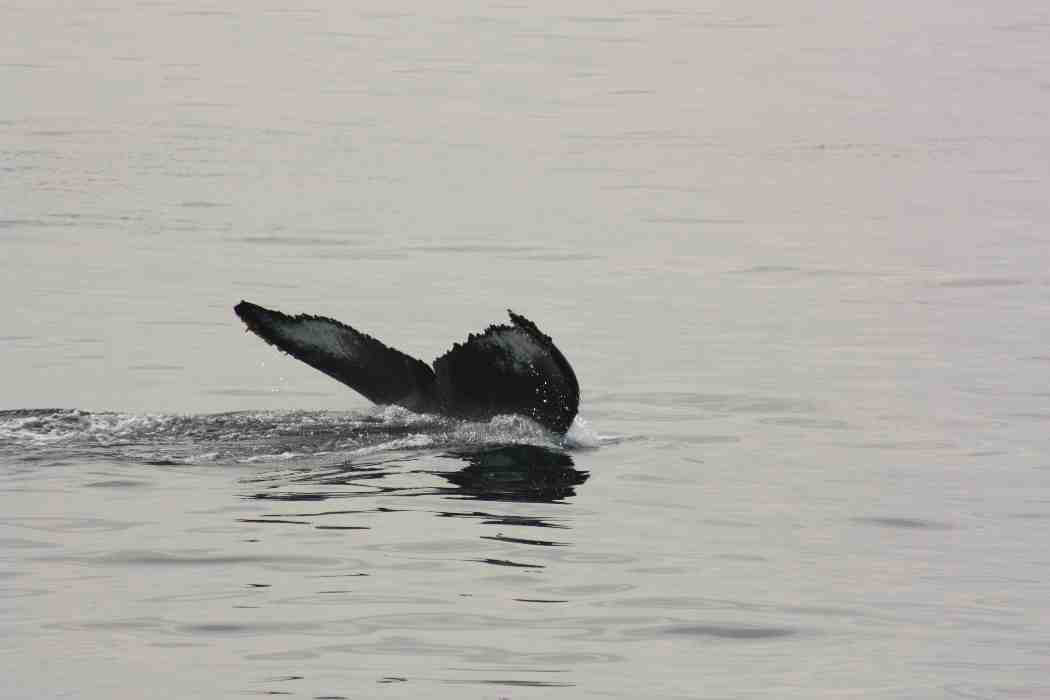

In [19]:
img = PIL.Image.open(fn); img

In [20]:
img.size

(1050, 700)

In [21]:
size_d = {k: PIL.Image.open(PATH+k). size for k in data.trn_ds.fnames}

In [22]:
row_sz,col_sz = list(zip(*size_d.values()))

In [23]:
row_sz=np.array(row_sz); col_sz=np.array(col_sz)

In [24]:
row_sz[:5]

array([1050, 1050,  700, 1000, 1050])

(array([   2.,   21.,   37.,   65.,  146.,  185.,  646.,  333.,  411., 6034.]),
 array([  64. ,  162.6,  261.2,  359.8,  458.4,  557. ,  655.6,  754.2,  852.8,  951.4, 1050. ]),
 <a list of 10 Patch objects>)

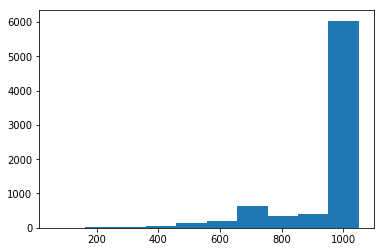

In [25]:
plt.hist(row_sz)

(array([ 103.,   90.,  120.,  537.,  137.,  174.,  231.,  256.,  189., 5878.]),
 array([ 501. ,  555.9,  610.8,  665.7,  720.6,  775.5,  830.4,  885.3,  940.2,  995.1, 1050. ]),
 <a list of 10 Patch objects>)

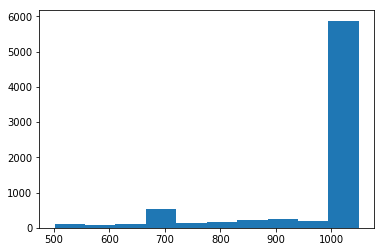

In [26]:
plt.hist(row_sz[row_sz>500])

In [27]:
len(data.trn_ds), len(data.test_ds)

(7880, 15610)

In [28]:
len(data.classes), data.classes[:5]

(4251, ['new_whale', 'w_0013924', 'w_001ebbc', 'w_002222a', 'w_002b682'])

# 3 Get data

In [33]:
def get_data(sz):
  tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
  return ImageClassifierData.from_csv(PATH, 'train', f'{PATH}train.csv', test_name='test', num_workers=4, val_idxs=val_idxs, tfms=tfms, bs=bs)
  

# 3.1 Choosing a learning rate

In [34]:
data = get_data(sz)

In [35]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 270/270 [46:59<00:00, 10.44s/it]


In [44]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 92%|█████████▏| 125/136 [00:03<00:00, 32.40it/s, loss=54.1]


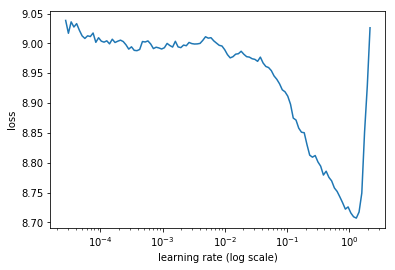

In [45]:
learn.sched.plot()

In [46]:
lr = .5

# 3 Initial model

In [48]:
learn.fit(.1, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

RuntimeError: Assertion `cur_target >= 0 && cur_target < n_classes' failed.  at /pytorch/torch/lib/THNN/generic/ClassNLLCriterion.c:87